# Анализ рынка недвижимости в Санкт-Петербурге
В моём распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Моя задача — установить параметры, которые позволят построить автоматизированную систему: которая отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных, например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Цели исследования
1. Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
1. Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго.
1. Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружены.
1. Обозначить какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
1. Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
1. Изучить предложения квартир. Выяснить, какая область входит в центр. Постройте график: как цена зависит от удалённости от центра.
1. Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры. Сделать выводы.

## Информация о входных данных
* __``airports_nearest``__ — расстояние до ближайшего аэропорта в метрах (м)
* __``balcony``__ — число балконов
* __``ceiling_height``__ — высота потолков (м)
* __``cityCenters_nearest``__ — расстояние до центра города (м)
* __``days_exposition``__ — сколько дней было размещено объявление (от публикации до снятия)
* __``first_day_exposition``__ — дата публикации
* __``floor``__ — этаж
* __``floors_total``__ — всего этажей в доме
* __``is_apartment``__ — апартаменты (булев тип)
* __``kitchen_area``__ — площадь кухни в квадратных метрах (м²)
* __``last_price``__ — цена на момент снятия с публикации
* __``living_area``__ — жилая площадь в квадратных метрах(м²)
* __``locality_name``__ — название населённого пункта
* __``open_plan``__ — свободная планировка (булев тип)
* __``parks_around3000``__ — число парков в радиусе 3 км
* __``parks_nearest``__ — расстояние до ближайшего парка (м)
* __``ponds_around3000``__ — число водоёмов в радиусе 3 км
* __``ponds_nearest``__ — расстояние до ближайшего водоёма (м)
* __``rooms``__ — число комнат
* __``studio``__ — квартира-студия (булев тип)
* __``total_area``__ — площадь квартиры в квадратных метрах (м²)
* __``total_images``__ — число фотографий квартиры в объявлении

## Оглавление

* [Шаг 1. Изучение входных данных](#num1)
* [Шаг 2. Предобработка данных](#num2)
* [Шаг 3. Расчёт дополнительных параметров квартиры](#num3)
    * [3.1. Расчёт параметра: 'Цена квадратного метра'](#num31)
    * [3.2. Расчёт параметра:  'День недели публикации объявления'](#num32)
    * [3.3. Расчёт параметра:  'Этаж квартиры'](#num33)
    * [3.4. Расчёт параметров:  'Доля жилой площади' и 'Доля площади кухни'](#num34)
* [Шаг 4. Исследовательский анализ данных](#num4)
    * [4.1. Изучение параметров: площадь, цена, число комнат, высота потолков](#num41)
        * [4.1.1. Изучение параметра 'площадь'](#num411)
        * [4.1.2. Изучение параметра 'цена'](#num412)
        * [4.1.3. Изучение параметра 'число комнат'](#num413)
        * [4.1.4. Изучение параметра 'высота потолков'](#num414)
    * [4.2. Изучение 'времени продажи квартиры'](#num42)
    * [4.3. Избавления от выбросов и аномалий](#num43)
    * [4.4. Изучение факторов влияющих на стоимость квартиры](#num44)
        * [4.4.1. Изучение зависимости Цены от общей площади](#num441)
        * [4.4.2. Изучение зависимости Цены от удалённости от центра](#num442)
        * [4.4.3. Изучение зависимости Цены от количества комнат](#num443)
        * [4.4.4. Изучение зависимости Цены от типа этажа](#num444)
        * [4.4.5. Изучение зависимости Цены от даты публикации объявления](#num445)
    * [4.5. Топ-10 населённых пунктов](#num45)
    * [4.6. Изучение предложений квартир в "Санкт-Петербурге"](#num46)
    * [4.7. Анализ квартир в центре Санкт-Петербурга](#num47)
        * [4.7.1. Анализ территории и параметров квартиры](#num471)
        * [4.7.2. Анализ факторов влияющих на стоимость квартиры](#num472)
* [Общий вывод](#result)

<a id="num1"></a>
## Шаг 1. Изучение входных данных

Импортирую библиотеку __``Pandas``__ и создаю DataFrame с названием __``estate_data``__, которому присвою значение загруженного датасета с помощью метода __``.read_csv()``__ с аргументом __``sep='\t'``__

In [1]:
import pandas as pd      # Импорт библиотеки Pandas
import matplotlib.pyplot as plt # Импортирую библиотеку визуализации

ClrG = '\033[32m'                # Инициализирую переменную для вывода текста зелёным цветом 
ClrDef = '\033[0m'               # Инициализирую переменную для вывода текста с дефолтными настройками

# Создаю DataFrame с именем estate_data
estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# Создаю функцию для получения основной информации о датафрейме
def datainfo(dataframe):
    display(dataframe.head(10))
    display(dataframe.describe())
    dataframe.info()

Изучаю основную информацию о таблице __``estate_data``__

In [2]:
datainfo(estate_data)    # Получаю основную информацию о таблице

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### Получаю следующую структуру таблицы:
* Количество столбцов: __22__
* Количество строк: __23699__
* Тип данных в столбцах: __float64(14), int64(3), object(3), bool(2)__

#### Проанализировав полученную таблицу, можно выделить следующие проблемы:
* Столбец __'ceiling_height'__ имеет пропущенные значения
* Столбец __'floors_total'__ имеет пропущенные значения
* Столбец __'living_area'__ имеет пропущенные значения
* Столбец __'is_apartment'__ имеет пропущенные значения
* Столбец __'kitchen_area'__ имеет пропущенные значения
* Столбец __'balcony'__ имеет пропущенные значения
* Столбец __'locality_name'__ имеет пропущенные значения
* Столбец __'airports_nearest'__ имеет пропущенные значения
* Столбец __'cityCenters_nearest'__ имеет пропущенные значения
* Столбец __'parks_around3000'__ имеет пропущенные значения
* Столбец __'parks_nearest'__ имеет пропущенные значения
* Столбец __'ponds_around3000'__ имеет пропущенные значения
* Столбец __'ponds_nearest'__ имеет пропущенные значения
* Столбец __'days_exposition'__ имеет пропущенные значения

Вызываю метод __``.columns``__ для изучения корректности заголовков таблицы

In [3]:
estate_data.columns    # Вывожу список заголовков таблицы 'estate_data'

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Вывод

Все наименования столбцов имеют корректный вид и пригодны для дальнейшей работы

Для ответа на поставленные вопросы, в дальнейшем анализе потребуется работать со следующими столбцами:
* __``total_area``__ — площадь квартиры в квадратных метрах (м²)
* __``last_price``__ — цена на момент снятия с публикации
* __``first_day_exposition``__ — дата публикации
* __``floors_total``__ — всего этажей в доме
* __``living_area``__ — жилая площадь в квадратных метрах(м²)
* __``kitchen_area``__ — площадь кухни в квадратных метрах (м²)
Исходя из этого я начну предобработку данных именно с анализа данных столбцов.

<a id="num2"></a>
### Шаг 2. Предобработка данных

Первым делом необходимо проанализировать столбцы на наличие отрицательных и пропущенных значений. Для удобства и автоматизации процесса создам список с нужными для анализа столбцами __``list_columns``__. После чего создам 2 цикла: __Первый цикл__ получит представление о выборке - числовое описание данных, с помощью метода __``.describe()``__. __Второй цикл__ проверит столбцы из списка на наличие пропущенных значений с помощью метода __``.isnull().sum()``__.

In [4]:
# Создаю список с нужными для анализа столбцами, о которых писал выше
list_columns = ['total_area', 'last_price', 'first_day_exposition', 'floors_total', 'living_area', 'kitchen_area']

# Создаю цикл, который применяет метод '.describe()' к каждому столбцу из списка 'list_columns'
for x in list_columns:
    print(estate_data[x].describe())
    print('')

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: flo

In [5]:
# Создаю цикл, который применяет метод '.isnull().sum()' к каждому столбцу из списка 'list_columns'
for x in list_columns:
    print('Пропущенные значения в', x,':', ClrG, estate_data[x].isnull().sum(), ClrDef)

Пропущенные значения в total_area :  0 
Пропущенные значения в last_price :  0 
Пропущенные значения в first_day_exposition :  0 
Пропущенные значения в floors_total :  86 
Пропущенные значения в living_area :  1903 
Пропущенные значения в kitchen_area :  2278 


#### Выявленные проблемы:
* В столбце __``floors_total``__ аномально высокое значение: __60__ этажей
* В столбце __``living_area``__ аномально низкое значение: __2__(м²)
* В столбце __``floors_total``__ имеется __86__ пропущенных значений
* В столбце __``living_area``__ имеется __1903__ пропущенных значений
* В столбце __``kitchen_area``__ имеется __2278__ пропущенных значений
* Столбец __``last_price``__ необходимо перевести из float в int
* Столбец __``total_area``__ необходимо перевести из float в int

Начну предобработку данных с избавления от пропущенных значений:

##### Избавление от пропущенных значений в столбце 'floors_total'
Исходя из описания данных, в столбце __``floors_total``__ записано количество этажей в доме. Заполнить пропущенные значения в данном столбце не считаю возможным, так как невозможно угадать сколько этажей в доме не зная точного адреса дома. Поэтому я принимаю решение удалить все строки, в которых пропущены значения столбца __``floors_total``__. Для этого воспользуюсь методом __``.dropna()``__.

In [6]:
# Удаляю строки с пропущенным значением в столбце 'floors_total'
estate_data.dropna(subset = ['floors_total'], inplace = True) 

# Вывод количества пропущенных значений в столбце 'floors_total'
print('Пропущенные значения в floors_total:', ClrG, estate_data['floors_total'].isnull().sum())

Пропущенные значения в floors_total:  0


##### Избавление от пропущенных значений в столбце 'living_area'
Исходя из описания данных, в столбце __``living_area``__ указана жилая площадь в квадратных метрах(м²). Так как в столбце  __``total_area``__ имеются все значения и нету пропусков, то пропуски в столбце __``living_area``__ можно заполнить следующим образом: 

Расчитать медианное значение такого показателя как __отношение жилой площади к общей площади__, сделать это можно по следующей формуле:

__Доля жилой площади__ = (__Жилая площадь__ / __Общая площадь__) * 100

Таким образом я узнаю долю __Жилой площади__ от __Общей площади__ квартиры. Но так как количество комнат в каждой квартире разное и я считаю, что от количества комнат зависит соотношение жилой площади к общей площади, поэтому необходимо расчитывать долю для каждого типа квартиры отдельно (для 1,2,3 и т.д. комнатных квартир). После чего я найду __медианное значение__ в процентном соотношении и применю его к пропущенным значениям в столбце __``living_area``__.

Для начала создам список __``list_rooms``__, в котором будет список всех вариантов квартир (количество комнат). Далее создам цикл, который будет перебирать все значения из списка __``list_rooms``__ и будет вычислять __среднее значение__ и __медиану__ для каждого типа квартир.

In [7]:
list_rooms = estate_data['rooms'].unique() # Создаю список с количеством комнат в квартирах
list_rooms.sort()  # сортирую список по возрастанию (для удобства)
print('Отношение "Жилой площади" к "Общей площади":') 
print('=' * 67)

# Цикл который берёт количество комнат из списка 'list_rooms' и подставляет это число в .query() запрос
# в ответ получает фильтрованные данные из 'estate_data', после чего вычисляется среднее и медиана 
# Отдельно для каждого количества комнат 
print('Количество комнат | Среднее значение  | Медиана')
for x in list_rooms:
    temp_data = estate_data.copy().query('rooms == @x and total_area > 0 and living_area > 0 and kitchen_area > 0')
    temp_data['living_area_percent'] = temp_data['living_area'] / temp_data['total_area']
    print(' {: <16}'.format(x), '|  {:.2%}'.format(temp_data['living_area_percent'].mean()), '          | {:.2%}'.format(temp_data['living_area_percent'].median()))

Отношение "Жилой площади" к "Общей площади":
Количество комнат | Среднее значение  | Медиана
 0                |  nan%           | nan%
 1                |  48.13%           | 48.00%
 2                |  57.93%           | 58.56%
 3                |  62.54%           | 63.17%
 4                |  64.59%           | 65.90%
 5                |  64.00%           | 65.07%
 6                |  66.57%           | 67.86%
 7                |  65.74%           | 68.17%
 8                |  64.71%           | 68.94%
 9                |  61.23%           | 62.83%
 10               |  64.51%           | 65.31%
 11               |  71.01%           | 71.01%
 12               |  45.52%           | 45.52%
 14               |  64.87%           | 64.87%
 15               |  69.32%           | 69.32%
 16               |  66.67%           | 66.67%
 19               |  70.61%           | 70.61%


Для подсчёта медианы доли __"Жилой площади"__ для квартир с __0__ комнатами - студии, необходимо написать отдельный __``.query()``__ запрос.

In [8]:
temp_data_null = estate_data.copy().query('rooms == 0 and total_area > 0 and living_area > 0')
temp_data_null['living_area_percent'] = temp_data_null['living_area'] / temp_data_null['total_area']
print('Количество комнат:', ClrG, '0', ClrDef, '|  Среднее значение:', ClrG, '{:.2%}'.format(temp_data_null['living_area_percent'].mean()), ClrDef, '|  Медиана:', ClrG, '{:.2%}'.format(temp_data_null['living_area_percent'].median()))

Количество комнат:  0  |  Среднее значение:  68.55%  |  Медиана:  68.97%


Проанализировав полученные данные, я принимаю решение использовать __медианное значение__ для  заполнения пропущенных значений в столбце __``living_area``__. Для этого создаю словарь __``list_values``__ в который запишу медианное значение для каждой комнаты. *(1 комната: 0.48 и т.д.)*. Далее создаю функцию __``set_value_living_area``__, которую применю к датафрейму __``estate_data``__, данная функция на вход принимает строку из датафрейма, после чего для каждого __количества комнат__ расчитывает __жилую площадь__ исходя из формулы:

__Жилая площадь__ = __Общая площадь__ * __медиану доли жилой площади__ для каждого типа квартир

In [9]:
def set_value_living_area(row):   # Объявляю функцию 'set_value_living_area'
    # Создаю словарь 'list_values' в котором каждому типу комнат соответствует свой коэффициент
    list_values = {0: 0.69, 1: 0.48, 2: 0.58, 3: 0.63, 4: 0.66, 5: 0.65, 6: 0.68, 7: 0.68, 8: 0.69, 9: 0.63, 10: 0.65, 11: 0.71, 12: 0.46, 14: 0.65, 15: 0.69, 16: 0.67, 19: 0.71}
    rooms = row['rooms']         # Переменная 'rooms' равна значению из столбца 'rooms'
    living = row['living_area']  # Переменная 'living' равна значению из столбца 'living_area'
    total = row['total_area']    # Переменная 'total' равна значению из столбца 'total_area'
    if row['rooms'] == 0:        # Если комнат 0, то
        living = total * list_values[0]  # 'living_area' равна 'total_area' умноженное на 0 позицию в 'list_values'
        return living            # Функция возвращает новое значение 'living_area'
    elif row['rooms'] == 1:      # Дальше всё аналогично 
        living = total * list_values[1]
        return living        
    elif row['rooms'] == 2:
        living = total * list_values[2]
        return living
    elif row['rooms'] == 3:
        living = total * list_values[3]
        return living      
    elif row['rooms'] == 4:
        living = total * list_values[4]
        return living      
    elif row['rooms'] == 5:
        living = total * list_values[5]
        return living  
    elif row['rooms'] == 6:
        living = total * list_values[6]
        return living      
    elif row['rooms'] == 7:
        living = total * list_values[7]
        return living      
    elif row['rooms'] == 8:
        living = total * list_values[8]
        return living      
    elif row['rooms'] == 9:
        living = total * list_values[9]
        return living      
    elif row['rooms'] == 10:
        living = total * list_values[10]
        return living      
    elif row['rooms'] == 11:
        living = total * list_values[11]
        return living      
    elif row['rooms'] == 12:
        living = total * list_values[12]
        return living      
    elif row['rooms'] == 14:
        living = total * list_values[14]
        return living      
    elif row['rooms'] == 15:
        living = total * list_values[15]
        return living  
    elif row['rooms'] == 16:
        living = total * list_values[16]
        return living      
    elif row['rooms'] == 19:
        living = total * list_values[19]
        return living
    else:
        return living
    
# К датафрейму 'estate_data' применяю функцию 'set_value_living_area' с помощью метода '.apply()'
estate_data['living_area'] = estate_data.apply(set_value_living_area, axis=1)
print('Количество пропущенных значений в столбце living_area: ', ClrG, estate_data['living_area'].isnull().sum())

Количество пропущенных значений в столбце living_area:   0


Пропущенные значения в столбце __``living_area``__ успешно заменены на новое расчитанное значение.

##### Избавление от пропущенных значений в столбце 'kitchen_area'
Исходя из описания данных, в столбце __``kitchen_area``__ указана площадь кухни в квадратных метрах (м²). Так как в столбце  __``total_area``__ имеются все значения и нету пропусков, то пропуски в столбце __``kitchen_area``__ можно заполнить следующим образом: 

Расчитать медианное значение такого показателя как __отношение площади кухни к общей площади__, сделать это можно по следующей формуле:

__Доля площади кухни__ = (__Площадь кухни__ / __Общая площадь__) * 100

Таким образом я узнаю долю __Площади кухни__ от __Общей площади__ квартиры. 
Создам цикл, который будет перебирать все значения из списка __``list_rooms``__ и будет вычислять __среднее значение__ и __медиану__ для каждого типа квартир.

In [10]:
print('Отношение "Площади кухни" к "Общей площади":') 
print('=' * 67)

# Цикл который берёт количество комнат из списка 'list_rooms' и подставляет это число в .query() запрос
# в ответ получает фильтрованные данные из 'estate_data', после чего вычисляется среднее и медиана 
# Отдельно для каждого количества комнат 
print('Количество комнат | Среднее значение  | Медиана')
for x in list_rooms:
    temp_data = estate_data.copy().query('rooms == @x and total_area > 0 and living_area > 0 and kitchen_area > 0')
    temp_data['kitchen_area_percent'] = temp_data['kitchen_area'] / temp_data['total_area']
    print(' {: <16}'.format(x), '|  {:.2%}'.format(temp_data['kitchen_area_percent'].mean()), '          | {:.2%}'.format(temp_data['kitchen_area_percent'].median()))

Отношение "Площади кухни" к "Общей площади":
Количество комнат | Среднее значение  | Медиана
 0                |  nan%           | nan%
 1                |  24.99%           | 24.78%
 2                |  17.41%           | 16.11%
 3                |  14.08%           | 12.85%
 4                |  12.41%           | 11.22%
 5                |  11.35%           | 10.54%
 6                |  10.34%           | 9.89%
 7                |  9.19%           | 8.37%
 8                |  9.17%           | 10.92%
 9                |  7.51%           | 4.96%
 10               |  8.80%           | 9.16%
 11               |  6.69%           | 6.69%
 12               |  12.44%           | 12.44%
 14               |  7.56%           | 7.56%
 15               |  16.95%           | 16.95%
 16               |  4.81%           | 4.81%
 19               |  7.37%           | 7.37%


Проанализировав полученные данные, я принимаю решение использовать __медианное значение__ для  заполнения пропущенных значений в столбце __``kitchen_area``__. Для этого создаю словарь __``list_values_kitchen``__ в который запишу медианное значение для каждой комнаты. *(1 комната: 0.25 и т.д.)* Для квартир с __0 комнат__, значение площади кухни будет __равно 0__, так как такие квартиры являются __Студиями__ и кухня в них отсутствует. Далее создаю функцию __``set_value_kitchen_area``__, которую применю к датафрейму __``estate_data``__, данная функция на вход принимает строку из датафрейма, после чего для каждого __количества комнат__ расчитывает __площадь кухни__ исходя из формулы:

__Площадь кухни__ = __Общая площадь__ * __медиану доли площади кухни__ для каждого типа квартир

In [11]:
def set_value_kitchen_area(row):   # Объявляю функцию 'set_value_kitchen_area'
    # Создаю словарь 'list_values_kitchen' в котором каждому типу комнат соответствует свой коэффициент
    list_values_kitchen = {0: 0, 1: 0.25, 2: 0.16, 3: 0.13, 4: 0.11, 5: 0.11, 6: 0.10, 7: 0.08, 8: 0.11, 9: 0.05, 10: 0.09, 11: 0.07, 12: 0.12, 14: 0.08, 15: 0.17, 16: 0.05, 19: 0.07}
    rooms = row['rooms']         # Переменная 'rooms' равна значению из столбца 'rooms'
    kitchen = row['kitchen_area']  # Переменная 'kitchen' равна значению из столбца 'kitchen_area'
    total = row['total_area']    # Переменная 'total' равна значению из столбца 'total_area'
    if row['rooms'] == 0:        # Если комнат 0, то
        kitchen = 0              # 'kitchen_area' равна 0, т.к. квартира - студия
        return kitchen           # Функция возвращает новое значение 'kitchen_area'
    elif row['rooms'] == 1:      # Если комнат 1, то
        kitchen = total * list_values_kitchen[1] #'kitchen_area' равно 'total_area' умноженное на коэфф. из 'list_values_kitchen' 
        return kitchen           # Функция возвращает новое значение 'kitchen_area'
    elif row['rooms'] == 2:      # Дальше всё аналогично
        kitchen = total * list_values_kitchen[2]
        return kitchen
    elif row['rooms'] == 3:
        kitchen = total * list_values_kitchen[3]
        return kitchen      
    elif row['rooms'] == 4:
        kitchen = total * list_values_kitchen[4]
        return kitchen      
    elif row['rooms'] == 5:
        kitchen = total * list_values_kitchen[5]
        return kitchen  
    elif row['rooms'] == 6:
        kitchen = total * list_values_kitchen[6]
        return kitchen      
    elif row['rooms'] == 7:
        kitchen = total * list_values_kitchen[7]
        return kitchen      
    elif row['rooms'] == 8:
        kitchen = total * list_values_kitchen[8]
        return kitchen      
    elif row['rooms'] == 9:
        kitchen = total * list_values_kitchen[9]
        return kitchen      
    elif row['rooms'] == 10:
        kitchen = total * list_values_kitchen[10]
        return kitchen      
    elif row['rooms'] == 11:
        kitchen = total * list_values_kitchen[11]
        return kitchen      
    elif row['rooms'] == 12:
        kitchen = total * list_values_kitchen[12]
        return kitchen      
    elif row['rooms'] == 14:
        kitchen = total * list_values_kitchen[14]
        return kitchen      
    elif row['rooms'] == 15:
        kitchen = total * list_values_kitchen[15]
        return kitchen  
    elif row['rooms'] == 16:
        kitchen = total * list_values_kitchen[16]
        return kitchen      
    elif row['rooms'] == 19:
        kitchen = total * list_values_kitchen[19]
        return kitchen
    else:
        return kitchen
    
# К датафрейму 'estate_data' применяю функцию 'set_value_kitchen_area' с помощью метода '.apply()'
estate_data['kitchen_area'] = estate_data.apply(set_value_kitchen_area, axis=1)
print('Количество пропущенных значений в столбце kitchen_area: ', ClrG, estate_data['kitchen_area'].isnull().sum())

Количество пропущенных значений в столбце kitchen_area:   0


Пропущенные значения в столбце __``kitchen_area``__ успешно заменены на новое расчитанное значение.

##### Изменение типа данных в столбце 'last_price'
Столбец __``last_price``__ имеет тип данных __``float``__, его необхоимо изменить на __``int``__, а так же разделить на 1000, чтобы получить __``Стоимость квартиры``__ в __``Тысячах рублей``__ для удобства дальнейшего анализа. Для этого воспользуюсь методом __``.astype()``__.

In [12]:
estate_data['last_price'] = estate_data['last_price'] / 1000
estate_data['last_price'] = estate_data['last_price'].astype('int')

##### Изменение типа данных в столбце 'total_area'
Столбец __``total_area``__ имеет тип данных __``float``__, его необхоимо изменить на __``int``__ для удобства дальнейшего анализа. Для этого воспользуюсь методом __``.astype()``__.

In [13]:
estate_data['total_area'] = estate_data['total_area'].round().astype('int')

##### Заполнение пропущенных значений в столбце 'days_exposition'
Для начала проверю количество пропущеных значений в столбце __``days_exposition``__ с помощью метода __``.isnull()``__

In [14]:
print('Количество пропусков:', estate_data['days_exposition'].isnull().sum())

Количество пропусков: 3172


Исходя из описания данных, столбец __``days_exposition``__ содержит следующую информацию: сколько дней было размещено объявление (от публикации до снятия). Логично предположить, что пропущенных значений в данном столбце быть не дожно, так как данное значение расчитывается автоматически системой, следовательно, пропущенное значение __'NaN'__ означает то, что объявление всё ещё актуально  и квартира ещё продаётся. Поэтому я считаю, что значение __``0``__ - будет означать то, что квартира ещё продаётся. Но для начала необходимо убедиться в том, что столбец __``days_exposition``__ не содержит нулей, для этого воспользуюсь методом __``.query()``__.

In [15]:
print(estate_data.query('days_exposition == 0'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


Записи со значением __``0``__ отсутствуют, значит я могу заменить все пропущенные значения в данном столбце на значение __``0``__ и считать его __``условным маркером``__, который означает, что __``квартира всё ещё на продаже``__. Для заполнения пропущенных значений воспользуюсь методом __``.fillna()``__.

In [16]:
# Заменяю пропущенные значения в 'days_exposition' на 0
estate_data['days_exposition'] = estate_data['days_exposition'].fillna(0)
# Проверяю количество пропущенных значений
print('Количество пропусков:', ClrG, estate_data['days_exposition'].isnull().sum())

Количество пропусков:  0


##### Заполнение пропущенных значений в столбце 'ceiling_height'
Для начала проверю столбец 'ceiling_height' на наличие пропусков с помощью метода __``.isnull()``__

In [17]:
print('Количество пропусков в столбце "ceiling_height":', ClrG, estate_data['ceiling_height'].isnull().sum())

Количество пропусков в столбце "ceiling_height":  9118


Итак, столбец со значением высоты потолка имеет 9118 пропусков, что в свою очередь составляет 38.6% от общего объёма данных. Исходя из логических соображений я считаю, что восстановить пропущенные данные основываясь на каких-то конкретных расчётах невозможно, единственный объективный вариант заполнения пропусков в данном столбце, это заполнение пропусков на __медианное значение__ для каждого типа квартир по отдельности. *(медиана для 1, 2, 3, 4 комнатных квартир)*

Для расчёта медианы для каждого вида квартир я создам цикл, который расчитает медиану и запишет её в список __``medians_list``__

In [18]:
rooms_list = estate_data['rooms'].unique()  # Создаю список с вид квартир (по комнатам)
rooms_list.sort()     # Сортирую по возрастанию (для удобства)
medians_list = []     # Список с медианными значениями для каждого вида квартир
for x in rooms_list:  # Цикл
    # 'ceiling_height_data' равна пропущенным значениям 'ceiling_height' и комната 'X' из цикла
    ceiling_height_data = estate_data.query('ceiling_height == "NaN" and rooms == @x')
    # Чистые данные = 'estate_data' где в 'ceiling_height' есть значения для 'rooms' равному 'X' из цикла
    clear_data = estate_data.query('ceiling_height !="NaN" and rooms == @x')
    medians = clear_data['ceiling_height'].median() # расчёт медианы для чистых данных
    medians_list.append(medians)   # Запись расчитанного значения медианы в список 'medians_list'
print(medians_list) # вывод полученного списка

[2.75, 2.64, 2.6, 2.65, 2.8, 3.1, 3.2, 3.38, 3.42, 3.2, 3.15, 3.415, 2.8, 3.16, 3.5, 3.0, nan]


Медианные значения для каждого типа квартир успешно расчитаны. Стоит добавить значение для 19 комнатной квартиры вручную, т.к. посчитать медиану для данной квартиры невозможно. Теперь можно создать функцию __``fill_ceiling_height``__ и заполнить пропущенные значения в столбце __``ceiling_height``__.

In [19]:
# Список медианных значений для каждого типа квартир
medians_list = [2.75, 2.64, 2.6, 2.65, 2.8, 3.1, 3.2, 3.38, 3.42, 3.2, 3.15, 3.415, 2.8, 3.16, 3.5, 3.0, 2.65]

# Объявляю функцию 'fill_ceiling_height' которая заполнит пропущенные значения в столбце 'ceiling_height'
def fill_ceiling_height(row):   
    ceiling = row['ceiling_height'] # Переменная 'ceiling' равна значению столбца 'ceiling_height'
    rooms = row['rooms'] # Переменная 'rooms' равна значению столбца 'rooms'
#    if ceiling != 'NaN':
    if pd.isna(ceiling) == False:   # Если значение 'ceiling_height' не пропущено, то
        return ceiling   # Вернуть новое значение 'ceiling_height'
    else:                # Иначе
        if rooms == 0:   # Если количество комнат равно 0, то
            ceiling = medians_list[0]  # Высота потолка равна значению 0 индекса из списка 'medians_list'
            return ceiling             # Вернуть новое значение 'ceiling_height'
        elif rooms == 1:               # Дальше всё аналогично
            ceiling = medians_list[1]
            return ceiling    
        elif rooms == 2:
            ceiling = medians_list[2]
            return ceiling
        elif rooms == 3:
            ceiling = medians_list[3]
            return ceiling           
        elif rooms == 4:
            ceiling = medians_list[4]
            return ceiling       
        elif rooms == 5:
            ceiling = medians_list[5]
            return ceiling       
        elif rooms == 6:
            ceiling = medians_list[6]
            return ceiling       
        elif rooms == 7:
            ceiling = medians_list[7]
            return ceiling       
        elif rooms == 8:
            ceiling = medians_list[8]
            return ceiling       
        elif rooms == 9:
            ceiling = medians_list[9]
            return ceiling       
        elif rooms == 10:
            ceiling = medians_list[10]
            return ceiling       
        elif rooms == 11:
            ceiling = medians_list[11]
            return ceiling     
        elif rooms == 12:
            ceiling = medians_list[12]
            return ceiling     
        elif rooms == 14:
            ceiling = medians_list[13]
            return ceiling     
        elif rooms == 15:
            ceiling = medians_list[14]
            return ceiling     
        elif rooms == 16:
            ceiling = medians_list[15]
            return ceiling 
        elif rooms == 19:
            ceiling = medians_list[16]
            return ceiling


# К датафрейму 'estate_data' применяю функцию 'fill_ceiling_height' с помощью метода '.apply()'
estate_data['ceiling_height'] = estate_data.apply(fill_ceiling_height, axis=1)

##### Заполнение пропущенных значений в столбце 'cityCenters_nearest '
Для начала посчитаю количество пропусков в столбце __``cityCenters_nearest``__.

In [20]:
print('Количество пропусков:', ClrG, estate_data['cityCenters_nearest'].isnull().sum(), ClrDef)
print('Процент пропущенных значений от общей таблицы:', ClrG, estate_data['cityCenters_nearest'].isnull().sum() / len(estate_data) * 100, '%')

Количество пропусков:  5509 
Процент пропущенных значений от общей таблицы:  23.330368864608477 %


Пропущено 5500 значений, что составляет более 23% от количествах всех записей датафрейма. Это очень много чтобы просто избавиться от строк с пропусками, поэтому для заполнения пропущенных значений в данном столбце я думаю, что самым правильным вариантом заполнения пропусков является вычисление медианного значения до центра для каждого населенного пункта. Так как получить более точные значения не вижу возможным. Для получения медианы расстояния до центра для каждого населённого пункта я воспользуюсь методом группировки __``.groupby``__ по столбцу __``locality_name``__.

In [21]:
median_center = estate_data.groupby('locality_name').agg({'cityCenters_nearest': 'median'})
print('Пропусков в населённых пунктах:', median_center.isnull().sum())

Пропусков в населённых пунктах: cityCenters_nearest    338
dtype: int64


Для __338__ населённых пунктов не удалось посчитать медианное значение до центра. Это говорит о том, что выбранный метод заполнения пропусков для столбца __``cityCenters_nearest``__ не подойдёт. В таком случае у меня не остаётся другого варианта кроме как заполнить пропуски "условным маркером", например __0.666__. В дальнейшем анализе данный маркер будет использоваться в срезах данных. *(.query)*

In [22]:
estate_data['cityCenters_nearest'] = estate_data['cityCenters_nearest'].fillna(0.666)
print('Количество пропусков:', ClrG, estate_data['cityCenters_nearest'].isnull().sum())

Количество пропусков:  0


<a id="num3"></a>
## Шаг 3. Расчёт дополнительных параметров квартиры

<a id="num31"></a>
### 3.1 Расчёт параметра: 'Цена квадратного метра'
Для расчёта стоимости "цены квадратного метра" для каждой квартиры, необходимо воспользоваться следующей формулой:

__Цена квадратного метра__ = __Стоимость квартиры__ / __Общая площадь квартиры__

__``cost_area``__ = __``last_price``__ / __``total_area``__

Новый столбец __"цена квадратного метра"__ я назову __``cost_area``__ и добавлю его к датафрейму __``estate_data``__. Значения в новом столбце округлю до целого числа с помощью метода __``.astype(int)``__.

In [23]:
estate_data['cost_area'] = (estate_data['last_price'] / estate_data['total_area']).astype(int)

<a id="num32"></a>
### 3.2 Расчёт параметра:  'День недели публикации объявления'
Новый столбец в который будет записано значение дня недели в который было опубликовано объявление  __``public_day``__ я создам с помощью метода __``.dt.weekday``__. Столбец с месяцем публикации объявления __``public_month``__ я создам с помощью метода __``.dt.month``__.  Столбец с годом публикации объявления __``public_day``__ я создам с помощью метода __``.dt.year``__.

In [24]:
# Преобразую столбец 'first_day_exposition' к типу данных datetime с помощью метода '.to_datetime()'
estate_data['first_day_exposition'] = pd.to_datetime(estate_data['first_day_exposition'], format='%Y-%m-%dT%S:%M:%H')
estate_data['public_year_num'] = estate_data['first_day_exposition'].dt.year   # Создаю столбец День публикации
estate_data['public_month_num'] = estate_data['first_day_exposition'].dt.month # Создаю столбец Месяц публикации
estate_data['public_day_num'] = estate_data['first_day_exposition'].dt.weekday # Создаю столбец Год публикации

Далее для создания более читабельного вида я создам 2 функции: 
* Функция __``change_public_day``__ - функция изменит числовые значения __дня публикации объявления__ на текстовые значения. *Например 0 = Понедельник*


* Функция __``change_public_month``__ - функция изменит числовые значения __месяца публикации объявления__ на текстовые значения. *Например 1 = Январь*

In [25]:
# Объявляю функцию 'change_public_day' которая изменяет числовое значение "Дня публикации" на текстовое значение
def change_public_day(row):
    # Создаю словарь 'list_days' в котором каждому числовому значению Дня соответствует текстовое значение
    list_days = {0: 'Понедельник', 1: 'Вторник', 2: 'Среда', 3: 'Четверг', 4: 'Пятница', 5: 'Суббота', 6: 'Воскресенье'}
    days = row['public_day_num'] # Переменная 'days' равна значению из столбца 'public_day'
    if days == 0:            # Если 'public_day' равно 0, то 
        days = list_days[0]  # Значение 'public_day' равно 'Понедельник'
        return days          # Вернуть новое значение переменной 'days'
    elif days == 1:          # Дальше всё аналогично
        days = list_days[1]
        return days        
    elif days == 2:
        days = list_days[2]
        return days      
    elif days == 3:
        days = list_days[3]
        return days      
    elif days == 4:
        days = list_days[4]
        return days
    elif days == 5:
        days = list_days[5]
        return days  
    elif days == 6:
        days = list_days[6]
        return days
    else:
        return days

# К датафрейму 'estate_data' применяю функцию 'change_public_day' с помощью метода '.apply()'
estate_data['public_day'] = estate_data.apply(change_public_day, axis=1)


# Аналогичным образом создаю функцию 'change_public_month' для изменения числового значения "Месяц публикации" на текстовое значение
def change_public_month(row):
    # Создаю словарь 'list_month' в котором каждому числовому значению Месяца соответствует текстовое значение
    list_month = {1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'}
    month = row['public_month_num'] # Переменная 'month' равна значению из столбца 'public_month'
    if month == 1:              # Если 'public_month' равно 1, то
        month = list_month[1]   # Значение 'public_month' равно 'Январь'
        return month            # Вернуть новое значение переменной 'days'
    elif month == 2:            # Дальше всё аналогично
        month = list_month[2]  
        return month      
    elif month == 3:
        month = list_month[3]
        return month      
    elif month == 4:
        month = list_month[4]
        return month
    elif month == 5:
        month = list_month[5]
        return month  
    elif month == 6:
        month = list_month[6]
        return month
    elif month == 7:
        month = list_month[7]
        return month 
    elif month == 8:
        month = list_month[8]
        return month    
    elif month == 9:
        month = list_month[9]
        return month    
    elif month == 10:
        month = list_month[10]
        return month
    elif month == 11:
        month = list_month[11]
        return month
    elif month == 12:
        month = list_month[12]
        return month    
    else:
        return month

# К датафрейму 'estate_data' применяю функцию 'change_public_month' с помощью метода '.apply()'
estate_data['public_month'] = estate_data.apply(change_public_month, axis=1)

<a id="num33"></a>
### 3.3 Расчёт параметра:  'Этаж квартиры'
Новый столбец будет называться __``floor_type``__, значения в данном столбце будут указываться следующим образом:

* Если столбец __``floor``__ равен __1__, то столбец __``floor_type``__ = __Первый этаж__


* Если столбец __``floor``__ равен __``floors_total``__, то столбец __``floor_type``__ = __Последний этаж__


* Во всех остальных случаях столбец __``floor_type``__ = __Другой этаж__

Создам функцию  __``set_floor_type``__, которая установит __тип этажа__ для столбца __``floor_type``__ согласно условию описанному выше.

In [26]:
# Объявляю функцию 'set_floor_type' которая установит "тип этажа" для каждой квартиры
def set_floor_type(row):
    floor = row['floor']         # Переменная 'floor' равна этажу квартиры
    total = row['floors_total']  # Переменная 'total' равна сколько всего этаже в доме
    if floor == 1:               # Если 'floor' равен 1, то 
        floor = 'Первый этаж'    # Значение 'floor' равно 'Первый этаж'
        return floor             # Вернуть новое значение переменной 'floor'
    elif floor == total:         # Иначе если Этаж равен значению Всего этажей в доме, то
        floor = 'Последний этаж' # Значение 'floor' равно 'Последний этаж'
        return floor             # Вернуть новое значение переменной 'floor'
    else:                        # Иначе
        floor = 'Другой этаж'    # Значение 'floor' равно 'Другой этаж'
        return floor             # Вернуть новое значение переменной 'floor'


# К датафрейму 'estate_data' применяю функцию 'set_floor_type' с помощью метода '.apply()'
estate_data['floor_type'] = estate_data.apply(set_floor_type, axis=1)

Для удобства в дальнейшем анализе, создам новый столбец __``floor_type_id``__ в котором каждому типу этажа будет присвоен __id__ следующим образом:
* Первый этаж: __id__ = __1__
* Последний этаж: __id__ = __2__
* Другой этаж: __id__ = __0__

Для добавления столбца __``floor_type_id``__ создаю функцию __``set_floor_type_id``__.

In [27]:
# Объявляю функцию 'set_floor_type_id' которая установит "id этажа" для каждой квартиры
def set_floor_type_id(row):
    floor_type = row['floor_type'] 
    if floor_type == 'Первый этаж': # Если Значение 'floor_type' равно 'Первый этаж'
        return 1             # Вернуть значение 1
    elif floor_type == 'Последний этаж':  # Иначе если Значение 'floor_type' равно 'Последний этаж'
        return 2             # Вернуть значение 2
    else:                    # Иначе
        return 0             # Вернуть значение 0


# К датафрейму 'estate_data' применяю функцию 'set_floor_type_id' с помощью метода '.apply()'
estate_data['floor_type_id'] = estate_data.apply(set_floor_type_id, axis=1)

<a id="num34"></a>
### 3.4 Расчёт параметров:  'Доля жилой площади' и 'Доля площади кухни'
Чтобы найти соотношение жилой и общей площади, а также отношение площади кухни к общей, необходимо использовать следующую формулу:

* __Доля жилой площади__ = __Жилая площадь__ / __Общая площадь__

__``living_area_percent``__ = __``living_area``__ / __``total_area``__

* __Доля площади кухни__ = __Площадь кухни__ / __Общая площадь__

__``kitchen_area_percent``__ = __``kitchen_area``__ / __``total_area``__
<br>
<br>
<br>
Создам 2 новых столбца: __``living_area_percent``__ - __Доля жилой площади__  и  __``kitchen_area_percent``__ - __Доля площади кухни__.

In [28]:
estate_data['living_area_percent'] = estate_data['living_area'] / estate_data['total_area']
estate_data['kitchen_area_percent'] = estate_data['kitchen_area'] / estate_data['total_area']

<a id="num4"></a>
### Шаг 4. Исследовательский анализ данных 
<a id="num41"></a>
### 4.1. Изучение параметров: площадь, цена, число комнат, высота потолков
<a id="num411"></a>
### 4.1.1. Изучение параметра 'площадь'
Для детального изучения данного параметра необходимо категоризировать квартиры по размеру общей площади. Чтобы правильно произвести категоризацию значений в столбце __``total_area``__ я воспользуюсь методом __``.quantile()``__ и разделю данные с шагом ___20%___. Таким образом список значений разделится на ___5 частей___: 

Тип площади: 
* __Очень маленькая__:  __0-20%__ 
* __Маленькая__:        __21-40%__
* __Средняя__:       __41-60%__
* __Большая__:       __61-80%__ 
* __Очень большая__: __81-100%__

In [29]:
estate_data['total_area'].quantile([.20, .40, .60, .80]) # применяю '.quantile' с шагом 20%

0.2    38.0
0.4    46.0
0.6    58.0
0.8    75.0
Name: total_area, dtype: float64

Категоризация по столбцу __``total_area``__ будет происходить по следующим критериям:

Тип площади: 
* __Очень маленькая__: ``площадь`` <= __38__
* __Маленькая__: __38__ < ``площадь`` <= __46__
* __Средняя__: __46__ < ``площадь`` <= __58__
* __Большая__: __58__ < ``площадь`` <= __75__
* __Очень большая__: ``площадь`` > __75__


Создаю функцию __``set_area_type``__, которая создаст новый столбец __``area_type``__ в таблице __``estate_data``__ и присвоит ему значение соответствующее типу площади.

In [30]:
def set_area_type(row):       # Объявляю функцию 'set_area_type'
    area = row['total_area']  # Переменная 'area' равна значению из столбца 'total_area'
    if area <= 38:            # Если значение столбца 'total_area' меньше или равно 38, то:
        return 'Очень маленькая'  # Вернуть значение 'Очень маленькая'
    if area <= 46 and area > 38:  # Далее всё аналогично
        return 'Маленькая'
    if area <= 58 and area > 46:
        return 'Средняя'
    if area <= 75 and area > 58:
        return 'Большая'
    if area > 75:
        return 'Очень большая'
    else:                                # Иначе:
        return 'Нет данных'              # Вернуть значение 'Нет данных'
    
estate_data['area_type'] = estate_data.apply(set_area_type, axis=1) # Применяем метод .apply с аргументом 'set_area_type' к таблице 'estate_data'

Каждой квартире успешно присвоен __Тип площади__. Теперь можно построить график с использованием метода __``.plot()``__. Для начала создам датафрейм __``area_type_data``__ в который занесу сводную таблицу по столбцу __``area_type``__, после чего отсортировую её по столбцу __``total_area``__. Также добавлю новый столбец __``percent``__, который указывает какую долю занимает конкретный тип площади от общего числа квартир.

,total_area,percent
area_type,,
Очень маленькая,5184,21.954008
Большая,4710,19.946640
Маленькая,4667,19.764536
Очень большая,4540,19.226697
Средняя,4512,19.108118


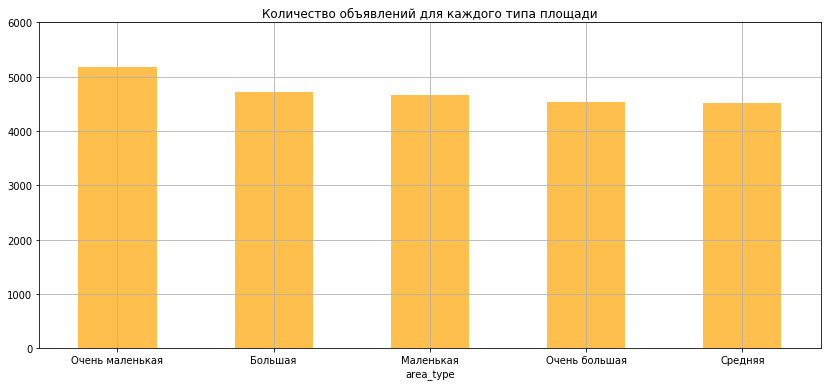


Самые большие площади:
19540    900
12859    631
3117     631
15651    618
5358     590
4237     517
8018     507
5893     500
15016    500
12401    495
Name: total_area, dtype: int64

Самые маленькие площади:
19904    12
19558    13
19807    13
19546    13
17961    13
19642    14
16949    15
12040    15
9412     16
8886     16
Name: total_area, dtype: int64

Описание столбца "total_area"
count    23613.000000
mean        60.333460
std         35.652522
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64
Медианное значение площади: 52.0


In [31]:
# Создаю датафрейм 'area_type_data' в который записываю сводную таблицу из датафрейма 'estate_data' со столбцами 'area_type' и 'total_area',
# Сортирую по возрастанию столбец 'total_area'
area_type_data = (
    estate_data
    .pivot_table(index='area_type', values='total_area', aggfunc='count')
    .sort_values(by='total_area', ascending = False)
)

# Создаю новый столбец 'percent' равный 'total_area' / общее число квартир 
area_type_data['percent'] = (area_type_data['total_area'] / area_type_data['total_area'].sum()) * 100
display(area_type_data)  # Вывожу полученный датафрейм 'area_type_data'
# Рисую график с помощью метода .plot()
area_type_data.plot(y='total_area', grid=True, kind='bar', ylim=(0, 6000), color='orange', legend=False, alpha=0.7, figsize=(14, 6), title='Количество объявлений для каждого типа площади')
plt.xticks(rotation = 0)
plt.show()
# Создаю переменную 'top_total_area' - топ 10 самый больших площадей
top_total_area = estate_data.sort_values('total_area', ascending = False)['total_area'].head(10)
# Создаю переменную 'tail_total_area' - топ 10 самый маленьких площадей
tail_total_area = estate_data.sort_values('total_area')['total_area'].head(10)
print()
print('Самые большие площади:')
print(top_total_area)
print()
print('Самые маленькие площади:')
print(tail_total_area)
print()
print('Описание столбца "total_area"')
print(estate_data['total_area'].describe())
print('Медианное значение площади:', estate_data['total_area'].median())

Из графика видно, что распределение квартир по __типу площади__ достаточно равномерное. Количество квартир с __``очень маленькой площадью``__ самое больше = __5184__ квартир. Самое маленькое количество квартир со __``средней площадью``__ = __4512__ квартир. ``Маленькая``, ``Большая`` и ``Очень большая`` площади имеют почти одинаковые значения. Исходя из этих данных можно отметить, что наиболее популярными в продаже квартирами являются квартиры площадью до __38м²__ - количество таких объявлений порядка __22%__ от общего числа объявлений.

Самая маленькая площадь составляет всего __12м²__, а максимальная площадь в одном объявлении равна __900м²__. Средняя площадь равна __60м²__, а медианное значение равно __52м²__.
Для определения выбросов воспользуюсь методом __``.boxplot()``__ с помощью которого построю диаграмму размаха.

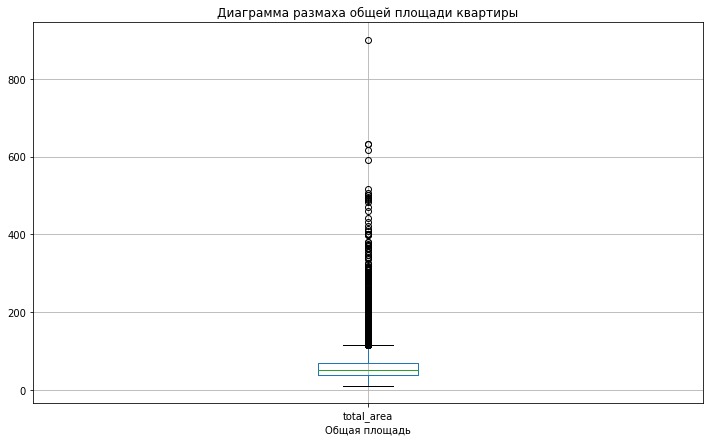

In [32]:
estate_data.boxplot(column='total_area', figsize=(12, 7))
plt.title('Диаграмма размаха общей площади квартиры')
plt.xlabel('Общая площадь')
plt.show() 

Необходимо задать ограничение в __116 м²__ и построить диаграмму размаха ещё раз, чтобы отсечь все выбросы и определить верхнюю границу отсечения данных.

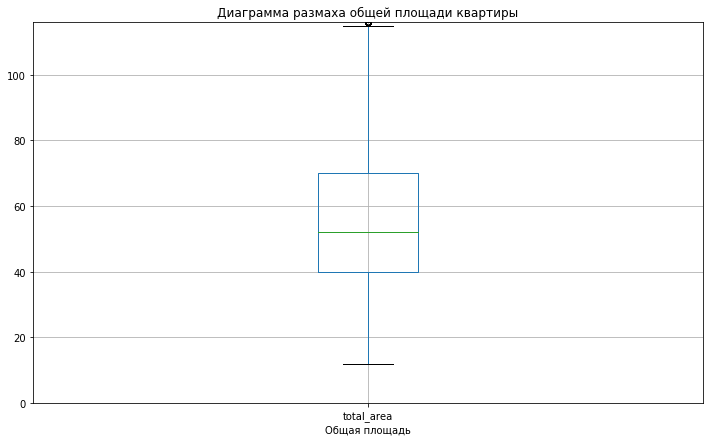

In [33]:
estate_data.boxplot(column='total_area', figsize=(12, 7))
plt.title('Диаграмма размаха общей площади квартиры')
plt.ylim(0, 116)
plt.xlabel('Общая площадь')
plt.show()

Благодаря диаграмме размаха мне удалось выяснить, что значение __115 м²__ является верхней границей, после которой значение "общая площадь" является выбросом и от таких значений можно избавляться.

<a id="num412"></a>
### 4.1.2. Изучение параметра 'цена'
Для начала получу числовое представление данных с помощью метода __``.describe()``__

In [34]:
estate_data['last_price'].describe()

count     23613.000000
mean       6540.539999
std       10901.717848
min          12.000000
25%        3400.000000
50%        4650.000000
75%        6799.000000
max      763000.000000
Name: last_price, dtype: float64

Судя по полученным данным, в столбце __``last_price``__ имеются аномальные большие и маленькие значения, которые необходимо отфильтровать. Чтобы увидеть выбросы я воспользуюсь методом __``.boxplot``__.

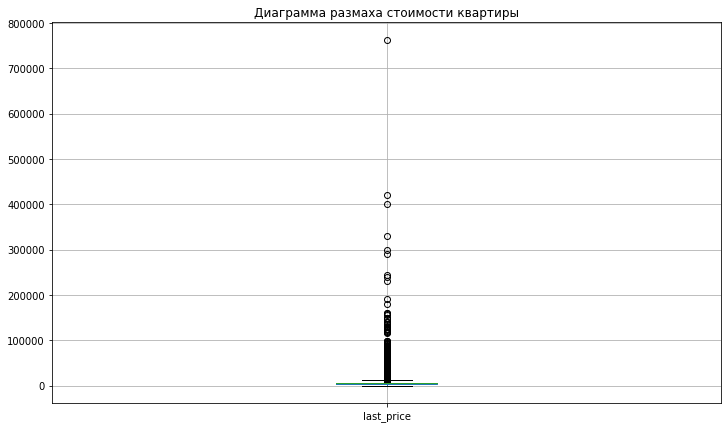

In [35]:
estate_data.boxplot(column='last_price', figsize=(12, 7))
plt.title('Диаграмма размаха стоимости квартиры')
plt.show() 

Отфильтрую значения свыше 13 млн. рублей и снова построю диаграмму размаха.

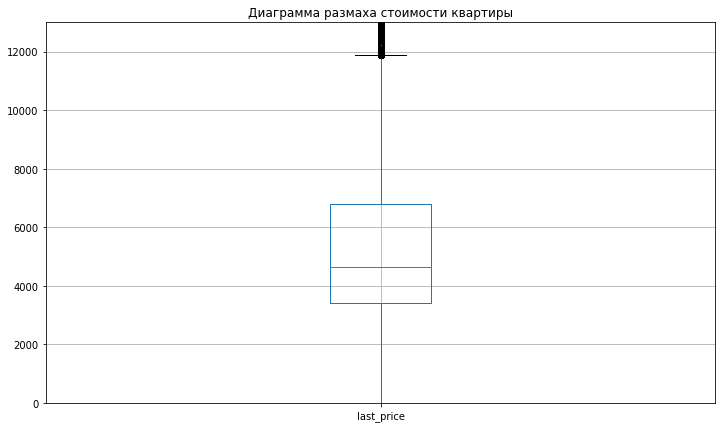

In [36]:
estate_data.boxplot(column='last_price', figsize=(12, 7))
plt.title('Диаграмма размаха стоимости квартиры')
plt.ylim(0, 13000)
plt.show() 

Видно, что имеются выбросы в районе __11.8 млн. рублей__. Чтобы узнать количество таких выбросов воспользуюсь методом __``.query()``__.

In [37]:
price_drops = estate_data.query('last_price > 11800')
print('Количество квартир дороже 11.8 млн. рублей:', ClrG, price_drops['last_price'].count(), 'шт.', ClrDef)
print('Топ 5 самых дешёвых квартир:')
price_tails = estate_data.sort_values(by='last_price').head(5)
print(price_tails['last_price'])

Количество квартир дороже 11.8 млн. рублей:  2058 шт. 
Топ 5 самых дешёвых квартир:
8793      12
17456    430
14911    430
16274    440
17676    450
Name: last_price, dtype: int64


Проанализировав полученные результаты, можно выделить границы отсечения выбросов и аномальных значений: __``меньше 400``__ тыс. рублей и __``больше 11800``__ тыс. рублей *(11.8 млн. руб)*. Для избавления от аномальных значений воспользуюсь методом __``.query()``__.

In [38]:
# Избавляюсь от выбросов в столбце 'last_price'
# отфильтрованные данные записываю в датафрейм "price_drops"
price_drops = estate_data.query('last_price > 400 and last_price < 11800')

Для визуализации стоимости недвижимости в зависимости от количества комнат, я воспользуюсь диаграммой рессеяния, которую создам с помощью метода __``.plot(kind='scatter')``__.

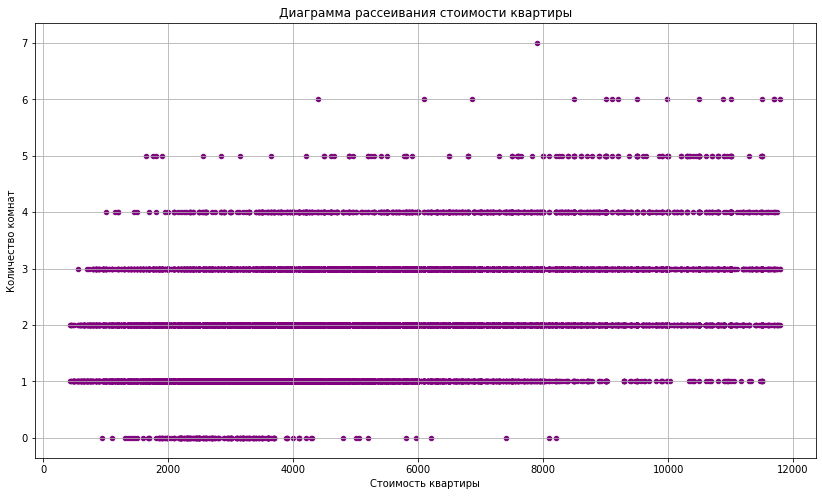

In [39]:
price_drops.plot(x='last_price', y='rooms', kind='scatter', figsize=(14, 8), grid=True, color='purple')
plt.title('Диаграмма рассеивания стоимости квартиры')
plt.ylabel('Количество комнат')
plt.xlabel('Стоимость квартиры')
plt.show()

Видно, что значений для квартир у которых более 5 комнат крайне мало, поэтому считаю правильным отфильтровать данные и визуализировать только те квартиры, в которых менее 6 комнат. Для этого воспользуюсь методом __``.query()``__

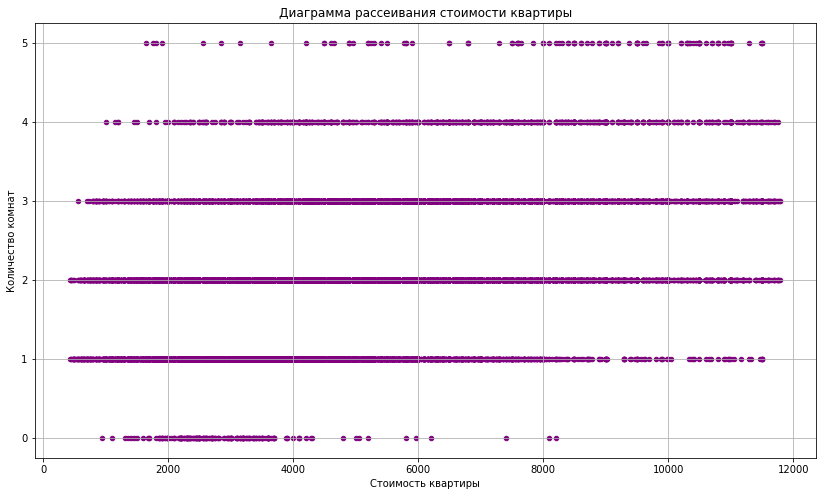

In [40]:
price_drops.query('rooms < 6').plot(x='last_price', y='rooms', kind='scatter', figsize=(14, 8), grid=True, color='purple')
plt.title('Диаграмма рассеивания стоимости квартиры')
plt.ylabel('Количество комнат')
plt.xlabel('Стоимость квартиры')
plt.show()

На диаграмме рассеяния видно, что самыми дорогими квартирами являются __2__, __3__ и __4 комнатные__ квартиры, их стоимость в некоторых случаях достиграет почти __11.8 млн. руб__. Наиболее плотные области на графике для __2__, __3__ комнатных квартир говорят о том, что в диапазоне __от 500 тыс. до 11.8__ млн. руб. больше всего объявлений о продаже. При визуальной оценке, можно сделать вывод, что цена на __студии__ находится в диапазоне от __1 млн. руб__ до примерно __4.3 млн руб.__. Если посмотреть на стоимость __5 комнатных квартир__ то можно отметить, что большинство таких квартир стоит в районе __8-10 млн. рублей__. 

Ниже представлены гистограммы, отражающие Медианное значение стоимости квартир и Максимальную стоимость в зависимости от количества комнат в квартире. *(до 5 комнат)*

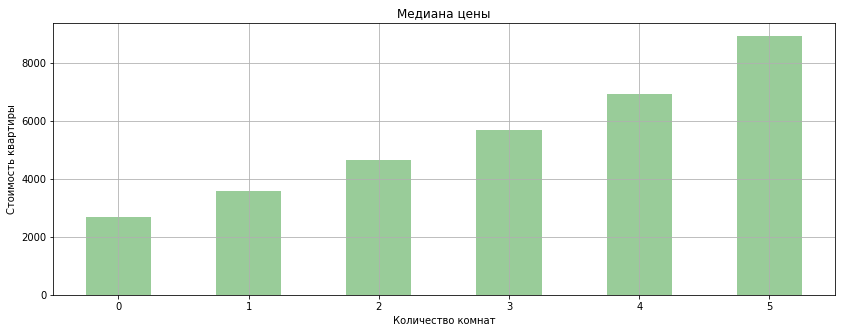

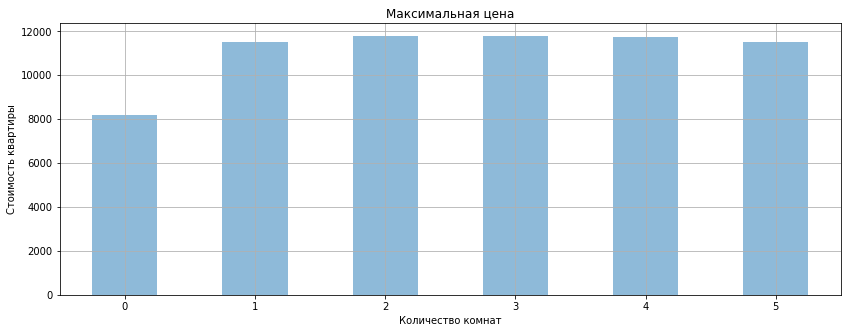

Средняя стоимость квартир:  4832.53 тыс. рублей


In [41]:
# Гистограмма "Медиана цены"
(
    price_drops
    .query('rooms < 6')
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(y='last_price', kind='bar', figsize=(14, 5), title='Медиана цены', grid=True, legend=False, color='green', alpha=0.4)
)
plt.ylabel('Стоимость квартиры')
plt.xlabel('Количество комнат')
plt.xticks(rotation = 0)
plt.show()

# Гистограмма "Максимальная цена"
(
    price_drops
    .query('rooms < 6')
    .pivot_table(index='rooms', values='last_price', aggfunc='max')
    .plot(y='last_price', kind='bar', figsize=(14, 5), title='Максимальная цена', grid=True, legend=False, alpha=0.5)
)
plt.ylabel('Стоимость квартиры')
plt.xlabel('Количество комнат')
plt.xticks(rotation = 0)
plt.show()
# Нахождение средней стоимости квартир
print('Средняя стоимость квартир:', ClrG, '{:.2f}'.format(price_drops['last_price'].mean()), 'тыс. рублей')

Теперь наглядно видно, что:
* медианная стоимость квартиры напрямую зависит от количества комнат: __Чем больше комнат - Тем выше медианное значение стоимости квартиры__.

* __Максимальная стоимость__ у __2__, __3__ и __4 комнатных__ квартир.

<a id="num413"></a>
### 4.1.3. Изучение параметра 'число комнат'
Для анализа данного параметра, я воспользуюсь методом визуализации __``.plot()``__ и построю  гистограмму, чтобы оценить какую долю составляет каждое количество комнат среди всех объявлений.

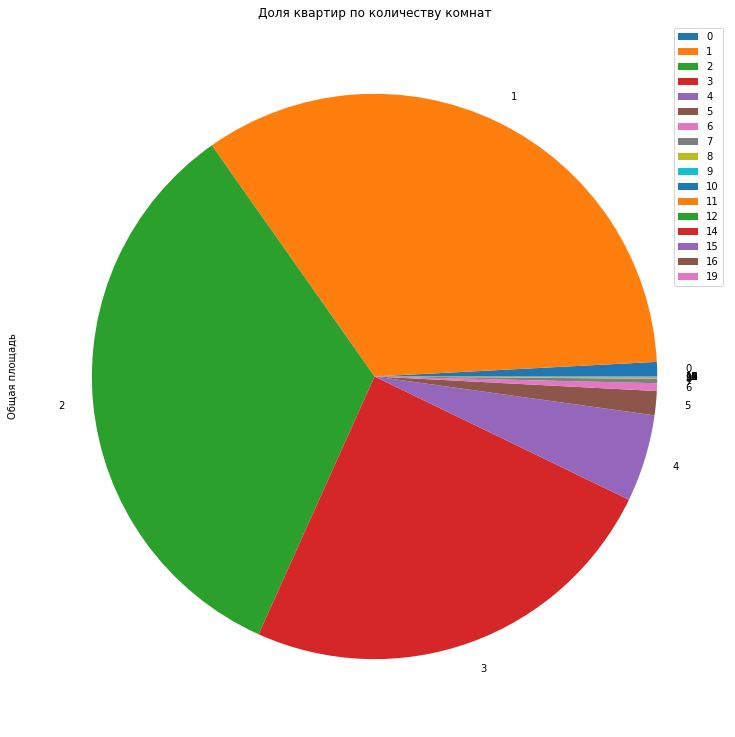

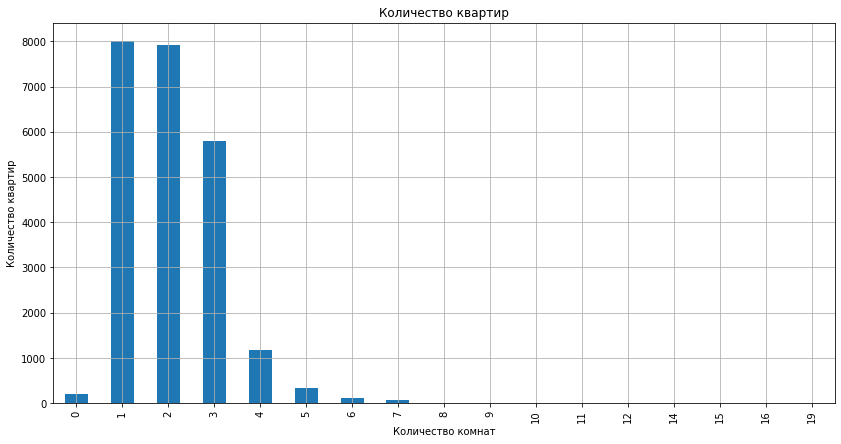

,total_area,percent
rooms,,
0,194,0.821581
1,8015,33.943167
2,7913,33.511201
3,5795,24.541566
4,1177,4.984542
5,325,1.376360
6,104,0.440435
7,59,0.249862
8,12,0.050819


In [42]:
# Создаю датафрейм 'rooms_chart' в котором сохраню количество объявлений для каждого вида комнат
rooms_chart = estate_data.pivot_table(index='rooms', values='total_area', aggfunc='count')

# Создаю новый столбец 'percent' в 'room_chart', в котором записываю долю каждого вида комнат от всех объявлений
rooms_chart['percent'] = (rooms_chart['total_area'] / rooms_chart['total_area'].sum()) * 100

# Рисую круговую гистограмму
rooms_chart.plot(y='total_area', kind='pie', figsize=(13, 13), title='Доля квартир по количеству комнат')
plt.ylabel('Общая площадь')
plt.show()
# Рисую столбчатую гистограмму
rooms_chart.plot(y='total_area', kind='bar', figsize=(14, 7), legend=False, grid=True, title='Количество квартир')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
display(rooms_chart)

Проанализировав полученные результаты можно сделать следующие выводы:
* Квартиры с __1__ и __2 комнатами__ наиболее популярные и занимают __34%__ и __33.5%__ соответственно
* Квартиры с __6__ и __более комнатами__ занимают __менее 1%__ от общего количества объявлений
* Квартиры с __0 комнатами__ - Студии - занимают __менее 1%__ от общего количества объявлений
* Наибольшее количество объявлений с продажей __1 комнатных квартир__ 
* Если выделить __топ 3__ самых популярных видов квартир, то в него войдут: __1__, __2__, __3 комнатные квартиры__.

<a id="num414"></a>
### 4.1.4. Изучение параметра 'высота потолков'
Для детального анализа параметра __``высота потолков``__ я построю гистограмму на которой наглядно будет отражено медианное значение высоты потолков для каждого типа квартиры *(количества комнат)*, для этого воспользуюсь методом __``.plot``__.

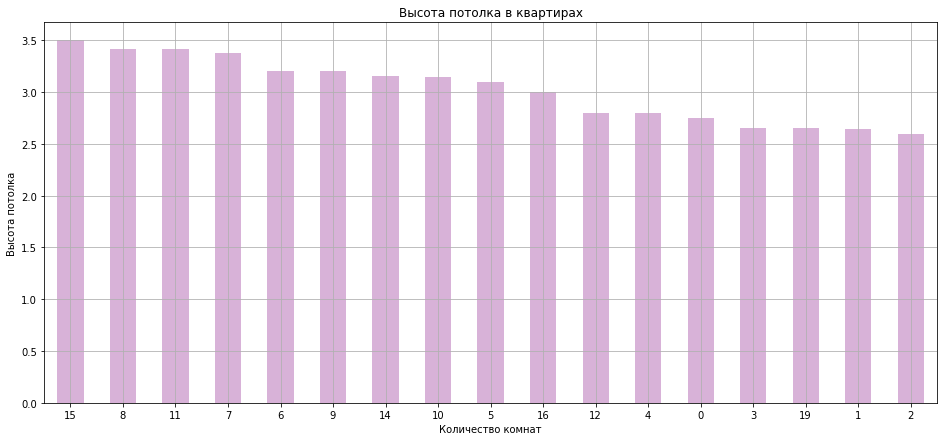


 Самые высокие потолки: 
22869    100.0
3148      32.0
22336     32.0
21377     27.5
10773     27.0
21824     27.0
5246      27.0
4876      27.0
20478     27.0
17857     27.0
Name: ceiling_height, dtype: float64

 Самые низкие потолки: 
22590    1.00
5712     1.20
16934    1.75
16446    2.00
11352    2.00
Name: ceiling_height, dtype: float64

Описание столбца "ceiling_height"
count    23613.000000
mean         2.722764
std          0.991474
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Медианное значение Высоты потолков:  2.64 м


In [43]:
# Формирую сводную таблице по столбцам 'rooms' и сортирую её по убыванию, после чего рисую график
(
    estate_data
    .pivot_table(index='rooms', values='ceiling_height', aggfunc='median')
    .sort_values(by='ceiling_height', ascending=False)
    .plot(y='ceiling_height', kind='bar', figsize=(16, 7), legend=False, color='purple', alpha=0.3, grid=True, title='Высота потолка в квартирах')
)
plt.xlabel('Количество комнат')
plt.ylabel('Высота потолка')
plt.xticks(rotation = 0)
plt.show()

# Создаю переменную 'top_ceiling_height' - топ 5 самых высоких потолков
top_ceiling_height = estate_data.sort_values('ceiling_height', ascending = False)['ceiling_height'].head(10)
# Создаю переменную 'tail_ceiling_height' - топ 5 самых низких потолков
tail_ceiling_height = estate_data.sort_values('ceiling_height')['ceiling_height'].head(5)
print()
print(ClrG, 'Самые высокие потолки:', ClrDef)
print(top_ceiling_height)
print()
print(ClrG, 'Самые низкие потолки:', ClrDef)
print(tail_ceiling_height)
print()
print('Описание столбца "ceiling_height"')
print(estate_data['ceiling_height'].describe())
print()
print('Медианное значение Высоты потолков:', ClrG, estate_data['ceiling_height'].median(), 'м')

На графике видно, что самые высокие потолки у 15 комнатной квартиры, что конечно же является редкостью, если же анализировать квартир до 5 комнат, то ситуация следующая:
* Самые __низкие__ потолки в __2 комнатных__ квартирах
* Самые __высокие__ потолки в __5 комнатных__ квартирах
* __Медианное значение__ высоты потолка равно __2.64м__
* Встречаются такие аномальные значения как высота потолка __100м, 32м, 27м__ и __1м__, что считаю невозможным.

<a id="num42"></a>
### 4.2. Изучение 'времени продажи квартиры'
Для начала построю __диаграмму размаха__ для определения диапазона нормальных значений и опеределения выбросов. Воспользуюсь методом __``.boxplot()``__

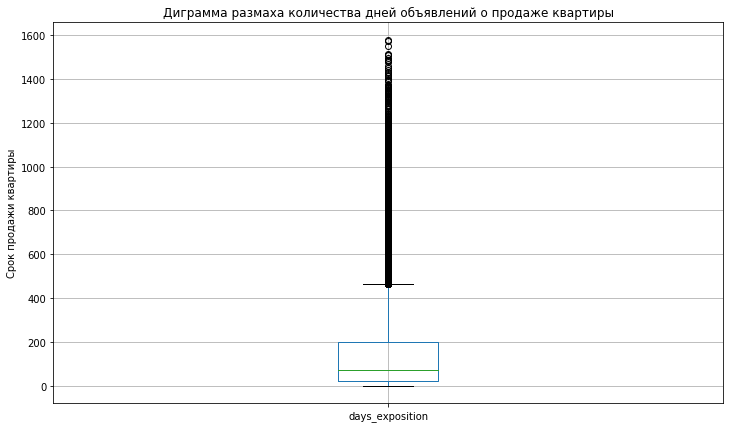

In [44]:
estate_data.boxplot('days_exposition', figsize=(12, 7))
plt.title('Диграмма размаха количества дней объявлений о продаже квартиры')
plt.ylabel('Срок продажи квартиры')
plt.show()

На графике хорошо видно, что выбросы начинаются после __450 дней__, отфильтрую значения и ещё раз нарисую диаграмму размаха.

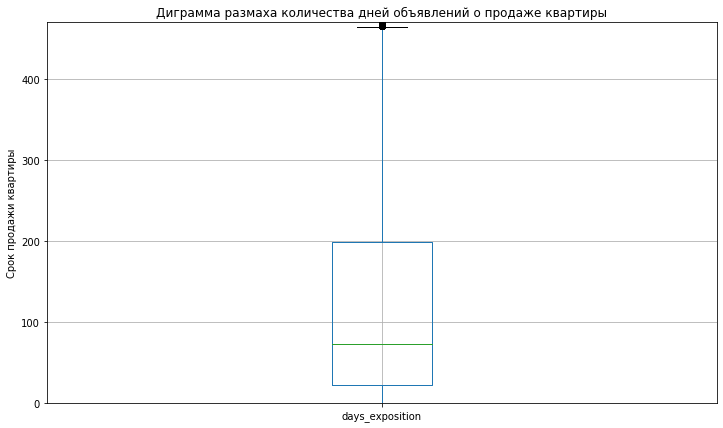

In [45]:
estate_data.boxplot(column='days_exposition', figsize=(12, 7))
plt.title('Диграмма размаха количества дней объявлений о продаже квартиры')
plt.ylabel('Срок продажи квартиры')
plt.ylim(0, 470)
plt.show()

Максимальное число дней для отсечения выбросов является __460 дней__. Нарисую гистограмму с помощью метода __``.plot()``__, на которой отражу количество дней продажи квартир относительно количества таких дней. Для этого сгруппирую таблицу по количеству дней продажи __``days_exposition``__ В расчёт не буду брать количество дней равных __0__, так как такие квартиры ещё находятся на продаже. 

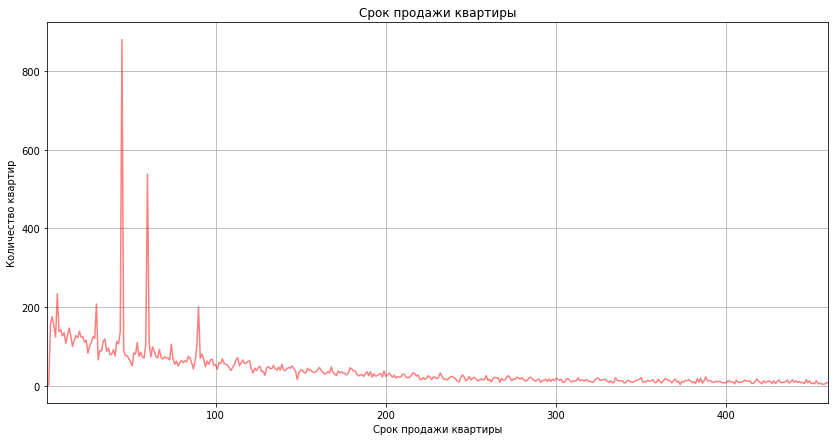

In [46]:
# Фильтрую значения и беру для расчётов только "дней продажи меньше 461"
days_exposition_drops = estate_data.query('days_exposition < 461')
# Рисую график
(
    days_exposition_drops
    .query('days_exposition > 0')
    .pivot_table(index='days_exposition', values='first_day_exposition', aggfunc='count')
    .plot(grid=True, figsize=(14, 7), legend=False, alpha=0.5, color='red', title='Срок продажи квартиры')
)
plt.ylabel('Количество квартир')
plt.xlabel('Срок продажи квартиры')
plt.show()

На гистограмме наглядно видно, что __чаще всего__ квартиры продаются в срок __до 100 дней__. Резкий скачок на графике на значении примерно __50 дней__ говорит о том, что очень много квартир продаются именно в этот срок. Примерно после 90 дней с момента публикации объявления квартиры продаются реже и заметна следующая тенденция: чем больше дней прошло с момента публикации объявления - тем реже покупают такие квартиры. Для подтверждения данных утверждений я воспользуюсь методом __``.value_counts()``__ и узнаю какое количество дней продажи квартиры встречается наиболее __часто__ и наиболее __редко__, а также посчитаю __медиану__ и __среднее время продажи квартир__, для этого воспользуюсь методами __``.median()``__ и __``.mean()``__.

In [47]:
x = days_exposition_drops.query('days_exposition > 0')['days_exposition'].value_counts()
print('Медиана дней продажи:', ClrG, days_exposition_drops['days_exposition'].median(), ClrDef)
print('Среднее количество дней продажи:', ClrG, days_exposition_drops['days_exposition'].mean(), ClrDef)
print('Наибольшое количество продаж:')
print('День |  Кол-во продаж')
print(ClrG, x.head(5))

Медиана дней продажи:  61.0 
Среднее количество дней продажи:  103.60432021508367 
Наибольшое количество продаж:
День |  Кол-во продаж
 45.0    880
60.0    538
7.0     234
30.0    208
90.0    201
Name: days_exposition, dtype: int64


Проанализировав данные о днях продажи, следует отметить, что чаще всего квартиры продаются через __45-60 дней__ с момента публикации объявления. В целом моя гипотеза __подтвердилась__, __``чаще всего квартиры продаются в первые 90 дней``__, после чего идёт спад продаж. Чтобы определить границы, которые отражают __"когда быстро"__ и __"когда слишком долго"__ продаётся квартира, я воспользуюсь срезом данных и изучу первые 100 дней с момента публикации объявления.

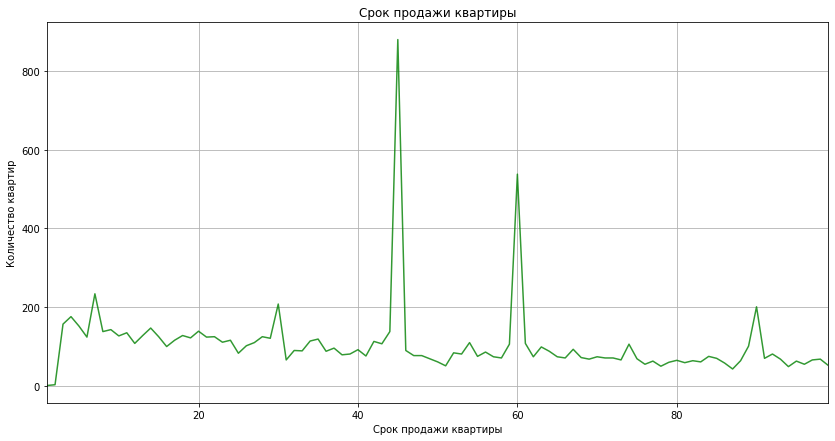

In [48]:
(
    days_exposition_drops
    .query('days_exposition < 100 and days_exposition > 0')
    .pivot_table(index='days_exposition', values='first_day_exposition', aggfunc='count')
    .plot(grid=True, figsize=(14, 7), legend=False, alpha=0.8, color='green', title='Срок продажи квартиры')
)
plt.ylabel('Количество квартир')
plt.xlabel('Срок продажи квартиры')
plt.show()

Проанализировав полученные данные, я могу с уверенностью заявить, что:
* Квартира продаётся __быстро__ в срок __до 41 дня__ с момента публикации объявления
* Квартира продаётся __слишком долго__ в срок, превышающий __90 дней__ с момента публикации объявления



<a id="num43"></a>
### 4.3. Избавления от выбросов и аномалий
Благодаря проделанному выше анализу, теперь я могу избавиться от выбросов и аномальных значений, которые сильно искажают общую картину при анализе данных. Новый и "очищенный" датафрейм я назову __``clear_estate_data``__ и весь дальнейший анализ буду проводить с данным датафреймом. Новый датафрейм буду формировать основываясь на результатах проведенного выше анализа, таким образом под фильтрацию попадают следующие значения:
* Общая площадь: __``'total_area < 115'``__
* Цена: __``'last_price > 400 and last_price < 11800'``__
* Количество комнат: __``'rooms < 6'``__
* Высота потолка: __``'ceiling_height > 2 and ceiling_height < 3.6'``__
* Дней продажи: __``'days_exposition > 0 and days_exposition < 461'``__

In [49]:
# Создаю новый "Очищенный" датафрейм 'clear_estate_data' с помощью метода '.query()'
clear_estate_data = (
    estate_data
    .query('total_area < 116 and last_price > 400 and last_price < 11800 and rooms < 6 and ceiling_height > 2 and ceiling_height < 3.6 and days_exposition > 0 and days_exposition < 461')
)

<a id="num44"></a>
### 4.4. Изучение факторов влияющих на стоимость квартиры
Для ответа на данный вопрос, необходимо изучить следующие взаимосвязи:
1. Зависит ли цена от __общей площади__
2. Зависит ли цена от __удалённости от центра__
3. Зависит ли цена от __числа комнат__
4. Зависит ли цена от того, __на каком этаже__ расположена квартира: первом, последнем или другом
5. Зависит ли цена от __даты размещения__ объявления: день недели, месяц, год

<a id="num441"></a>
### 4.4.1. Изучение зависимости Цены от общей площади
Для определения зависимости между такими параметрами как __цена__ и __общая площадь__ квартиры я воспользуюсь методом __``.plot()``__ и построю диаграмму рассеяния для визуальной оценки взаимосвязи параметров, после чего посчитаю __коэффициент корреляции Пирсона__ с помощью метода __``.corr()``__.

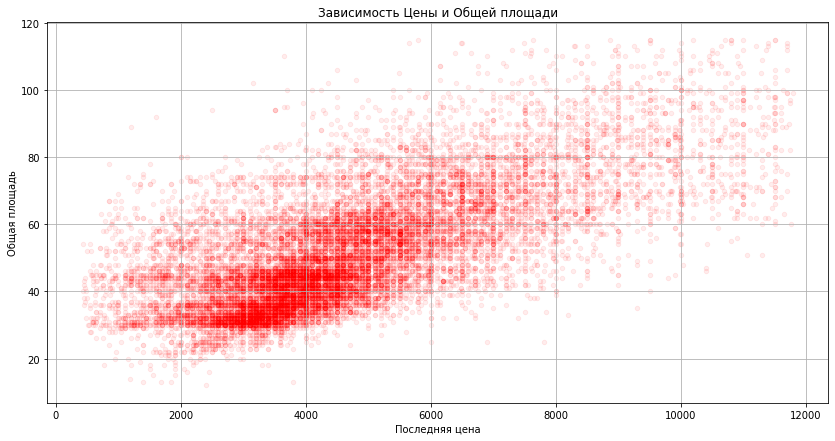

Коэффициент корреляции:  0.699


In [50]:
# Рисую диаграмму рассеяния по столбцам 'цена' и 'общая площадь'
(
    clear_estate_data
    .plot(x='last_price', y='total_area', kind='scatter', color='red', title='Зависимость Цены и Общей площади', figsize=(14, 7), sharex=False, grid=True, alpha=0.07)
)
plt.xlabel('Последняя цена')
plt.ylabel('Общая площадь')
plt.show()

corr_area = clear_estate_data['last_price'].corr(clear_estate_data['total_area'])
print('Коэффициент корреляции:', ClrG, '{:.3f}'.format(corr_area))

Анализ показал, что коэффициент корреляции Пирсона равен почти __0.7__, это говорит о том, что между параметрами __"цена"__ и __"общая площадь"__ имеется __положительная корреляция__ - __прямая зависимость__. Анализируя диаграмму рассеяния важно отметить, что наибольшая концентрация объявлений находится в ячейке с параметрами: __Цена - 4-6 млн. рублей__ и __Общая площадь - 40-60 м²__, это говорит о том, что больше всего объявлений имеют данные параметры. 

<a id="num442"></a>
### 4.4.2. Изучение зависимости Цены от удалённости от центра
Для определения зависимости между такими параметрами как __цена__ и __расстояние до центра__ квартиры я воспользуюсь методом __``.plot()``__ и построю диаграмму рассеяния для визуальной оценки взаимосвязи параметров, после чего посчитаю __коэффициент корреляции Пирсона__ с помощью метода __``.corr()``__.

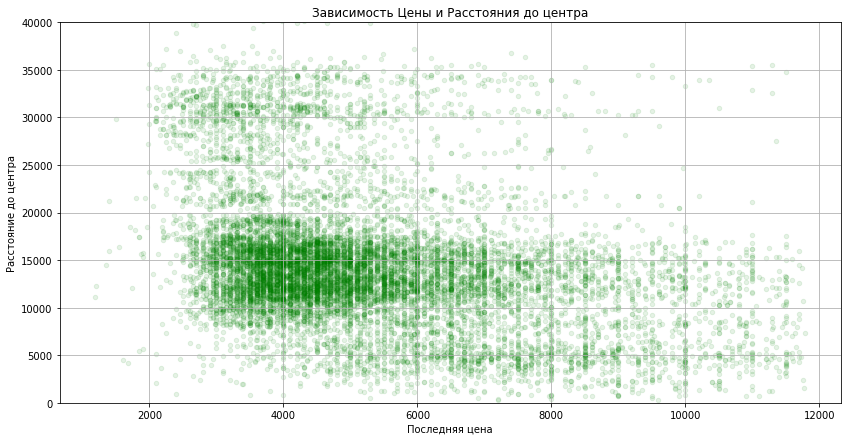

Коэффициент корреляции:  0.110


In [51]:
# Рисую диаграмму рассеяния по столбцам 'цена' и 'расстояние до центра'
(
    clear_estate_data
    .query('cityCenters_nearest != 0.666')
    .plot(x='last_price', y='cityCenters_nearest', kind='scatter', color='green', title='Зависимость Цены и Расстояния до центра', figsize=(14, 7), sharex=False, grid=True, alpha=0.1, ylim=(0, 40000))
)
plt.xlabel('Последняя цена')
plt.ylabel('Расстояние до центра')
plt.show()

corr_center = clear_estate_data['last_price'].corr(clear_estate_data['cityCenters_nearest'])
print('Коэффициент корреляции:', ClrG, '{:.3f}'.format(corr_center))

В данном случае коэффициент корреляции Пирсона равен всего __0.1__, это говорит о том, что между параметрами __"цена"__ и __"расстояние до центра"__ корреляция практически __отсутствует__. Наибольшая концентрация объявлений находится в ячейке с параметрами: __Цена - 3-6 млн. рублей__ и __расстояние от центра - 10-17 км__, это говорит о том, что больше всего объявлений имеют данные параметры. В зоне __менее 10 км__ имеются как дешёвые так и дорогие квартиры, поэтому завасимость данных параметров практически отсутствует. 

<a id="num443"></a>
### 4.4.3. Изучение зависимости Цены от количества комнат
Для определения зависимости между такими параметрами как __цена__ и __количество комнат__ квартиры я воспользуюсь методом __``.plot()``__ и построю столбчатую гистограмму для визуальной оценки взаимосвязи параметров, сравнивая __количество комнат__ и __среднюю цену__ квартир.

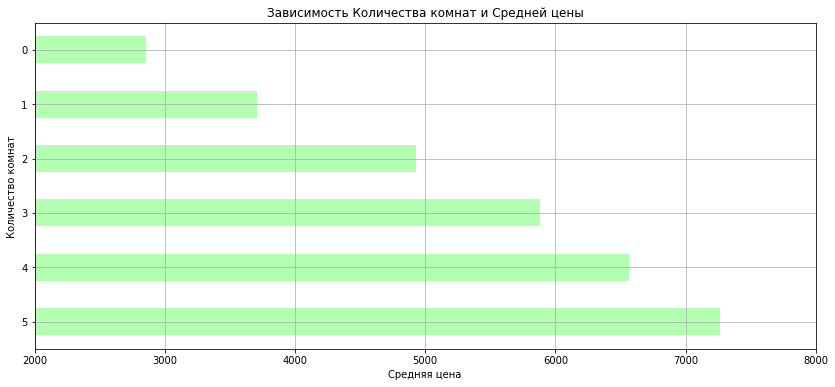

In [52]:
# Рисую график зависимости 'Количества комнат и Средней цены'
(
    clear_estate_data
    .pivot_table(index = 'rooms', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', color='lime', title='Зависимость Количества комнат и Средней цены', figsize=(14, 6), legend=False, alpha=0.3, grid=True, xlim=(2000, 8000))
)
plt.xlabel('Средняя цена')
plt.ylabel('Количество комнат')
plt.show()

График зависимости __количества комнат__ от __средней цены__ наглядно демонстрирует то, что между двуми исследуемыми параметрами __есть прямая зависимость__. На графике видно, что __чем больше комнат__ в квартире, тем __выше её средняя стоимость__.

<a id="num444"></a>
### 4.4.4. Изучение зависимости Цены от типа этажа
Для определения зависимости между такими параметрами как __цена__ и __на каком этаже__ расположена квартира я воспользуюсь методом __``.plot()``__ и построю столбчатую гистограмму для визуальной оценки взаимосвязи параметров, сравнивая __тип этажа__ и __среднюю стоимость__ квартиры.

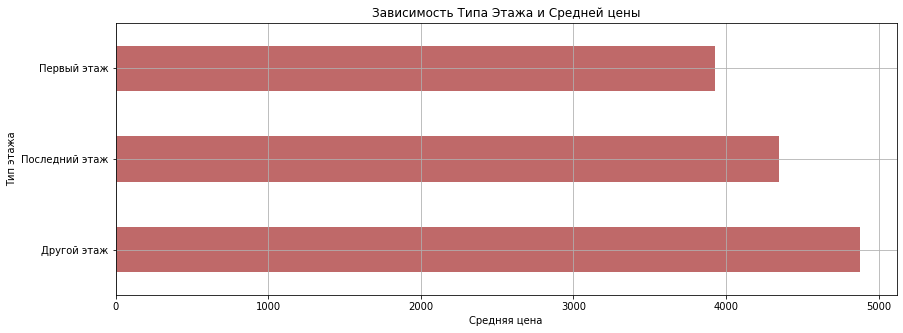

In [53]:
# Рисую график зависимости 'Типа Этажа и Средней цены'
(
    clear_estate_data
    .pivot_table(index = 'floor_type', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', title='Зависимость Типа Этажа и Средней цены', figsize=(14, 5), color='brown', legend=False, alpha=0.7, grid=True, ylim=(3800, 5000))
)
plt.xlabel('Средняя цена')
plt.ylabel('Тип этажа')
plt.show()

На графике видно, что самая __высокая средняя стоимость__ у квартир, которые расположены __выше первого__ и __ниже последнего__ этажа. __Самые дешевые__ квартиры находятся на __первом этаже__, разница в средней стоимости между первым и другим этажом (не последним) составляет почти __1 млн. рублей__, что довольно много. Проанализировав полученный график, можно сделать вывод о том, что __Средняя цена квартиры напрямую зависит от типа этажа__ на котором расположена квартира.

<a id="num445"></a>
### 4.4.5. Изучение зависимости Цены от даты публикации объявления
Для определения зависимости между такими параметрами как __цена__ и __дата публикации объявления__ *(день, месяц, год)* я воспользуюсь методом __``.plot()``__ и построю столбчатую гистограмму для визуальной оценки взаимосвязи параметров, сравнивая день, месяц, год и среднюю стоимость квартиры в этот момент.

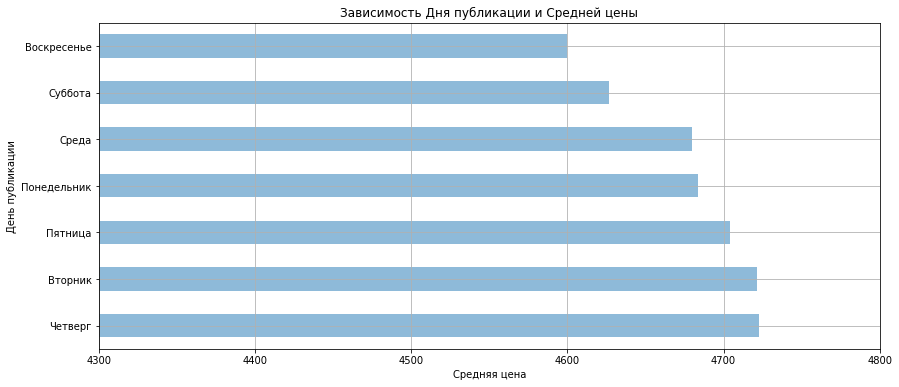

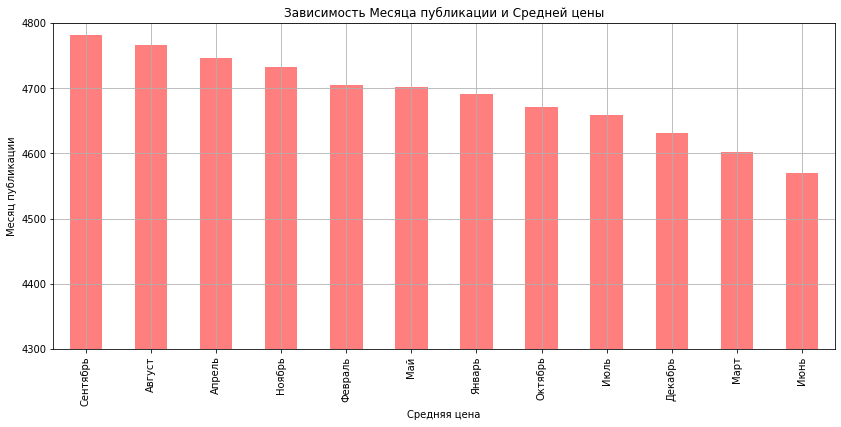

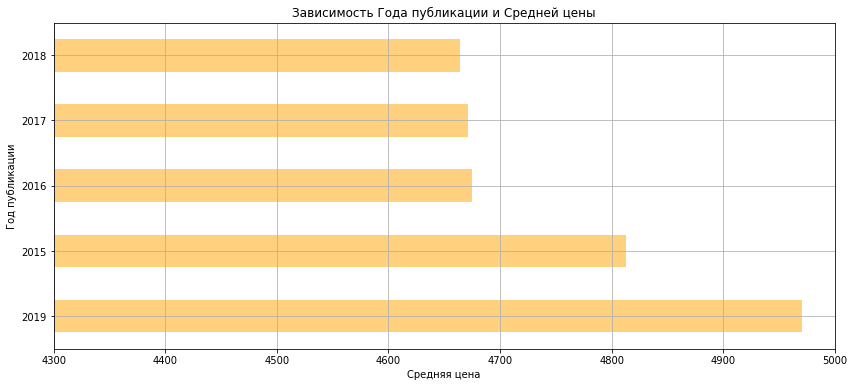

In [54]:
# Рисую график зависимости 'Дня публикации и Средней цены'
(
    clear_estate_data
    .pivot_table(index = 'public_day', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', title='Зависимость Дня публикации и Средней цены', figsize=(14, 6), legend=False, alpha=0.5, grid=True, xlim=(4300, 4800))
)
plt.xlabel('Средняя цена')
plt.ylabel('День публикации')
plt.show()

# Рисую график зависимости 'Месяца публикации и Средней цены'
(
    clear_estate_data
    .pivot_table(index = 'public_month', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='bar', title='Зависимость Месяца публикации и Средней цены', color='red', figsize=(14, 6), legend=False, alpha=0.5, grid=True, ylim=(4300, 4800))
)
plt.xlabel('Средняя цена')
plt.ylabel('Месяц публикации')
plt.show()
    
# Рисую график зависимости 'Года публикации и Средней цены'
(
    clear_estate_data
    .pivot_table(index = 'public_year_num', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', title='Зависимость Года публикации и Средней цены', color='orange', figsize=(14, 6), legend=False, alpha=0.5, grid=True, xlim=(4300, 5000))
)
plt.xlabel('Средняя цена')
plt.ylabel('Год публикации')
plt.show()

* Анализ __дня публикации__:

    Говоря о зависимости между __днём публикации объявления__ и __средней ценой__ квартир, на графике видно, что максимальная средняя цена обнаружена в такие дни как __вторник__ и __четверг__, то есть в рабочие дни и при этом минимальная средняя цена была замечена в воскресенье и субботу, то есть выходные дни. Складывается следующая закономерность: объявления опубликованные в будние дни имеют выше среднюю цену квартир чем в выходные дни. Назвать это прямой зависимостью по-моему мнению нельзя.


* Анализ __месяца публикации__:

    Анализируя график зависимости между __месяцем публикации объявления__ и __средней ценой__ квартир, можно отметить тот факт, что в __сентябре__ средняя цена квартир самая высокая, а в __июне__ самая низкая - на 230 тыс рублей ниже чем в сентябре. Данную особенность можно объяснить тем, что осенью строительные компании стараются завершить строительство и вводят объект в эксплуатацию, следовательно цена квартир возрастает, но это лишь предположение, которое не удастся подтвердить или опровергнуть в данной работе.


* Анализ __года публикации__:

    На графике видно, что в __2019 году__ средняя цена составила примерно __4.97 млн. руб.__, что является __самым высоким показателем__, это на __350 тыс. руб. больше__ чем в __2018 году__. В 2019 году ставки по ипотеке достигали минимальных значений, что в свою очередь вызвало повышенный спрос на недвижимость, думаю рост цен связан с увеличившимся спросом потребителей, но это лишь моё предположение. Если говорить о зависимости года публикации объявления на цену квиртары, то прямой корреляции здесь нет, безусловно стоимость квартир в разные годы отличается, но это обусловлено ситуацией на рынке недвижимости, которая ежегодна меняется.

Подводя итог анализа __факторов влияющих на стоимость квартиры__ *(пункт 4.4)* следует выделить наиболее значимые факторы, которые больше всего влияют на стоимость квартиры:
1. __Количество комнат в квартире__
2. __Этаж квартиры__
3. __Площадь квартиры__ 

<a id="num45"></a>
## 4.5. Топ-10 населённых пунктов
Для ответа на данный вопрос, необходимо изучить следующие параметры:
1. Населённые пункты с __наибольшим числом объявлений__
2. Средняя цена __квадратного метра__ в этих населённых пунктах
3. Населённые пункты с самой __высокой__ и __низкой__ стоимостью жилья

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
#####  Населённые пункты с наибольшим числом объявлений
Для начала подсчитаю количество объявлений для каждого населённого пункта и выведу только 10 населённых пунктов с наибольшим числом объявлений.

In [55]:
# Из очищенных данных 'clear_estate_data' формирую топ 10 пунктов по кол. объявлений
( 
    clear_estate_data
    .pivot_table(index='locality_name', values='last_price', aggfunc='count')
    .sort_values(by='last_price', ascending=False)
    .head(10)
)

,last_price
locality_name,
Санкт-Петербург,10837
посёлок Мурино,474
посёлок Шушары,377
Всеволожск,297
Колпино,285
посёлок Парголово,281
деревня Кудрово,263
Пушкин,252
Гатчина,237


##### Средняя цена квадратного метра в этих населённых пунктах

In [56]:
( # Из df 'clear_estate_data' беру только населённые пункты из списка полученного в пункте 4.5.1
    clear_estate_data # Формирую таблицу по среднему значению за кв.м. для каждого населённого пункта
    .query('locality_name == "Санкт-Петербург" | locality_name == "посёлок Мурино" | locality_name == "посёлок Шушары" | locality_name == "Всеволожск" | locality_name == "Колпино" | locality_name == "посёлок Парголово" | locality_name == "деревня Кудрово" | locality_name == "Пушкин" | locality_name == "Гатчина" | locality_name == "Выборг"')
    .pivot_table(index='locality_name', values='cost_area', aggfunc='mean')
    .sort_values(by='cost_area', ascending=False)
)

,cost_area
locality_name,
Санкт-Петербург,103.980530
Пушкин,99.023810
деревня Кудрово,92.148289
посёлок Парголово,88.871886
посёлок Мурино,85.556962
посёлок Шушары,77.320955
Колпино,74.122807
Гатчина,67.839662
Всеволожск,66.282828


* Населённый пункт с самой __высокой__ стоимостью жилья: __Санкт-Петербург__ = 104 тыс. рублей за м²

* Населённый пункт с самой __низкой__ стоимостью жилья: __Выборг__ = 57 тыс. рублей за м²

<a id="num46"></a>
## 4.6. Изучение предложений квартир в "Санкт-Петербурге"
Создаю новый датафрейм __``spb_estate_data``__ в который сохраню все строки которые относятся к городу ``Санкт-Петербург`` и расстояние до центра не равно ``условному маркеру __0.666__`` *(пропущенным значениям)*. После чего создаю новый столбец __``CenterKM``__ в который занесу расстояние до центра в __км__ и округлю его до целего числа.

In [57]:
spb_estate_data = clear_estate_data.copy().query('cityCenters_nearest != 0.666 and locality_name == "Санкт-Петербург"')

spb_estate_data['CenterKM'] = (spb_estate_data['cityCenters_nearest'] / 1000).round().astype('int')

Далее создаю новую переменную __``spb_estate_data_price``__ в которую занесу значения датафрейма __``spb_estate_data``__ сгруппированные по столбцу __``CenterKM``__ и рассчитаю среднее значение стоимости квартиры - это будет среднее значение стоимости каждого КМ. После чего использую метод __``.plot()``__ для создаю гистограммы, чтобы визуализировать полученные данные.

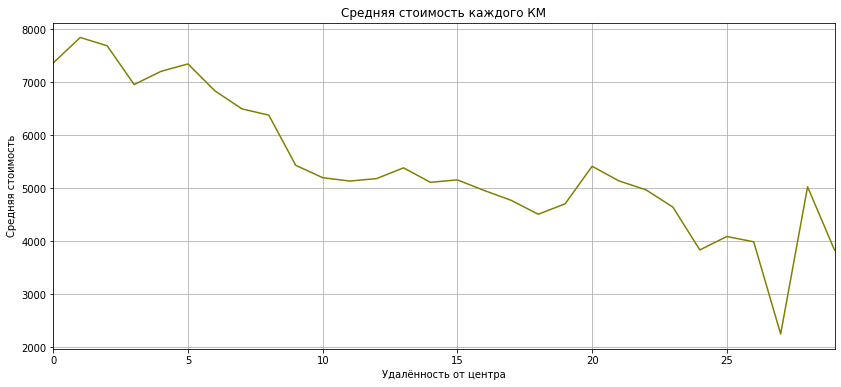

In [58]:
spb_estate_data_price = spb_estate_data.groupby('CenterKM', as_index = False).agg({'last_price' : 'mean'})
spb_estate_data_price.plot(x='CenterKM', y='last_price', legend=False, color='olive', grid=True, figsize=(14, 6), title='Средняя стоимость каждого КМ')
plt.ylabel('Средняя стоимость')
plt.xlabel('Удалённость от центра')
plt.show()

Проведя визуальный анализ полученного графика, можно выделить границу, которая отделяет центральную часть города от остальной части, по-моему мнению, в центральную зону входят все квартиры, расположенные на расстоянии __до 8 км__ от центра города. Все что находится дальше этой границы уже не относится к центральной части города.
<a id="num47"></a>
## 4.7. Анализ квартир в центре Санкт-Петербурга
<a id="num471"></a>
### 4.7.1. Анализ территории и параметров квартиры
##### Анализ площади в Санкт-Петербурге
Для начала создаю новый датафрейм __``spb_estate_data_center``__ в который занесу данные об квартирах расположенных в центральной зоне *(до 8км включительно)*.

In [59]:
spb_estate_data_center = spb_estate_data.query('CenterKM < 9')

Далее проанализирую площадь по центральному району Санкт-Петербурга аналогичным образом, как делал это в пункте ``4.1.1``.

,total_area,percent
area_type,,
Большая,531,27.036660
Очень большая,507,25.814664
Средняя,377,19.195519
Маленькая,311,15.835031
Очень маленькая,238,12.118126


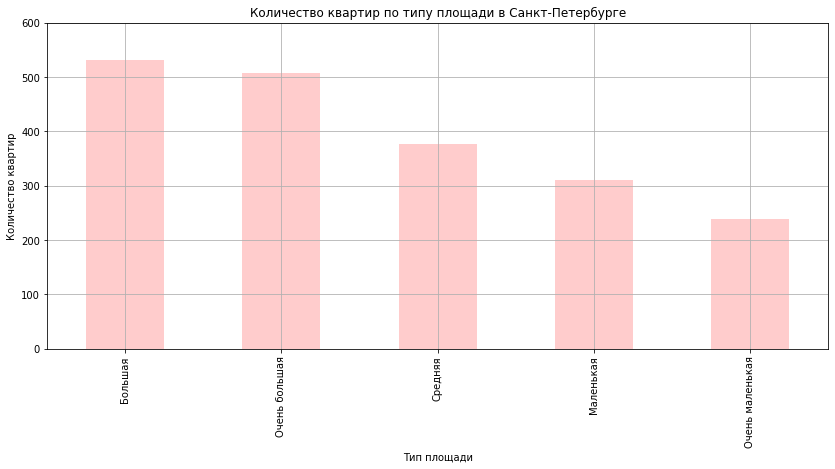


 Самые большие площади в центре Санкт-Петербурга: 
3253     115
11094    115
3525     115
12326    115
13370    115
Name: total_area, dtype: int64

 Самые маленькие площади в центре Санкт-Петербурга: 
19904    12
19807    13
19558    13
19546    13
8886     16
Name: total_area, dtype: int64

Описание столбца "total_area"
count    1964.000000
mean       61.813646
std        20.608964
min        12.000000
25%        46.000000
50%        60.000000
75%        76.000000
max       115.000000
Name: total_area, dtype: float64

Медианное значение площади в центре Санкт-Петербурга:  60.0


In [60]:
# Создаю датафрейм 'area_type_data' в который записываю сводную таблицу из датафрейма 'spb_estate_data_center' со столбцами 'area_type' и 'total_area',
# Сортирую по возрастанию столбец 'total_area'
area_type_data = (
    spb_estate_data_center
    .pivot_table(index='area_type', values='total_area', aggfunc='count')
    .sort_values(by='total_area', ascending = False)
)

# Создаю новый столбец 'percent' равный 'total_area' / общее число квартир 
area_type_data['percent'] = (area_type_data['total_area'] / area_type_data['total_area'].sum()) * 100
display(area_type_data)  # Вывожу полученный датафрейм 'area_type_data'
# Рисую график с помощью метода .plot()
area_type_data.plot(y='total_area', grid=True, kind='bar', ylim=(0, 600), legend=False, figsize=(14, 6), color='red', alpha=0.2, title='Количество квартир по типу площади в Санкт-Петербурге')
plt.ylabel('Количество квартир')
plt.xlabel('Тип площади')
plt.show()
# Создаю переменную 'top_total_area' - топ 5 самых больших площадей
top_total_area = spb_estate_data_center.sort_values('total_area', ascending = False)['total_area'].head(5)
# Создаю переменную 'tail_total_area' - топ 5 самых маленьких площадей
tail_total_area = spb_estate_data_center.sort_values('total_area')['total_area'].head(5)
print()
print(ClrG, 'Самые большие площади в центре Санкт-Петербурга:', ClrDef)
print(top_total_area)
print()
print(ClrG, 'Самые маленькие площади в центре Санкт-Петербурга:', ClrDef)
print(tail_total_area)
print()
print('Описание столбца "total_area"')
print(spb_estate_data_center['total_area'].describe())
print()
print('Медианное значение площади в центре Санкт-Петербурга:', ClrG, spb_estate_data_center['total_area'].median())

Из графика видно, что распределение квартир по __типу площади__  неравномерное. Количество квартир с __``большой площадью``__ самое больше = __27%__ квартир. Самое маленькое количество квартир с __``очень маленькой площадью``__ = __12%__ квартир. Данные показатели очень отличаются от ситуации в остальных городах и районах Санкт-Петербурга. Если предыдущий анализ показал, что наиболее популярными в продаже квартирами являются квартиры площадью до __38м²__, то для центра Санкт-Петербурга наиболее популярными являются квартиры площадью от __58__ до __75м²__. Медианное значение площади в центре Санкт-Петербурга составляет __60м²__, что в свою очередь на __8м²__ больше чем по остальным городам и районам.

##### Анализ цены в центре Санкт-Петербурга
Для проведения анализа цены по центральному району Санкт-Петербурга я сделаю анализ аналогичным образом, как делал это в пункте ``4.1.2``.

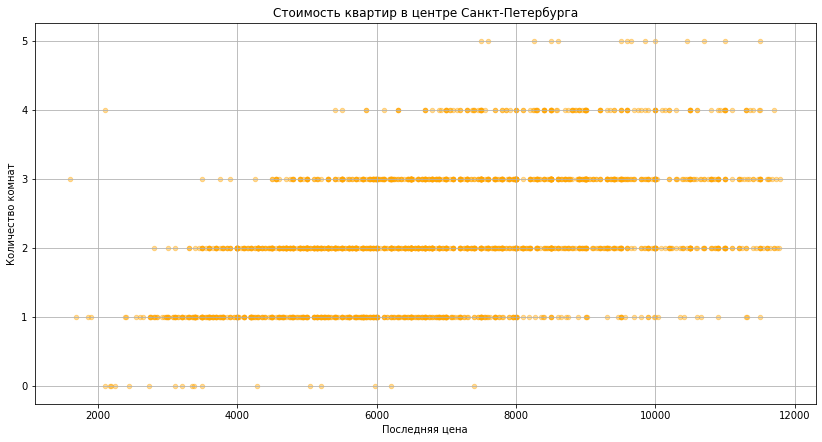

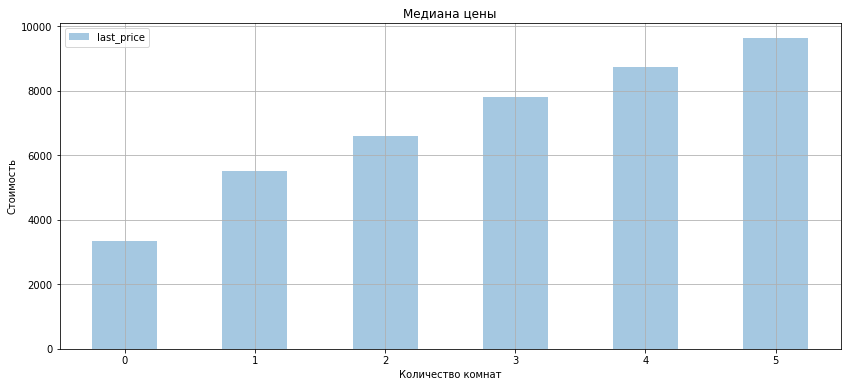

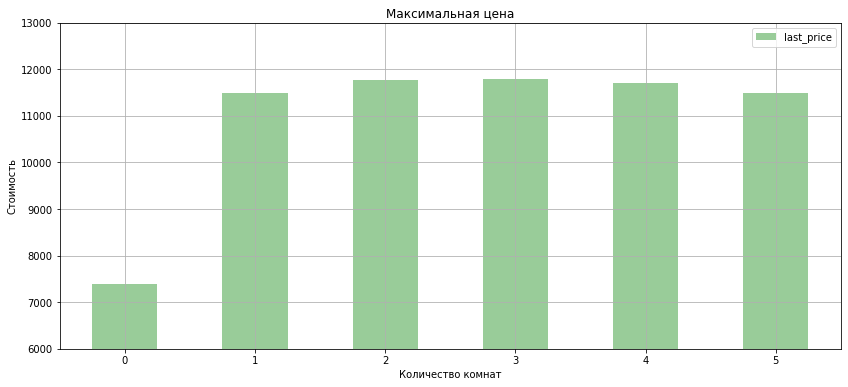

In [61]:
# Гистограмма "Рассеяния цены"
spb_estate_data_center.plot(x='last_price', y='rooms', kind='scatter', figsize=(14, 7), grid=True, color='orange', alpha=0.4, title='Стоимость квартир в центре Санкт-Петербурга')
plt.ylabel('Количество комнат')
plt.xlabel('Последняя цена')
plt.show()

# Гистограмма "Медиана цены"
(
    spb_estate_data_center
    .pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(y='last_price', kind='bar', figsize=(14, 6), title='Медиана цены', grid=True, alpha=0.4)
)
plt.ylabel('Стоимость')
plt.xlabel('Количество комнат')
plt.xticks(rotation = 0)
plt.show()

# Гистограмма "Максимальная цена"
(
    spb_estate_data_center
    .pivot_table(index='rooms', values='last_price', aggfunc='max')
    .plot(y='last_price', kind='bar', figsize=(14, 6), title='Максимальная цена', grid=True, color='green', ylim=(6000, 13000), alpha=0.4)
)
plt.ylabel('Стоимость')
plt.xlabel('Количество комнат')
plt.xticks(rotation = 0)
plt.show()

На графике видно, что:
* медианная стоимость квартиры в центре Санкт-Петербурга напрямую зависит от количества комнат: __Чем больше комнат - Тем выше медианное значение стоимости квартиры__.

* __Максимальная стоимость__ у __2__, __3__ и __4 комнатных__ квартир. Это наблюдение аналогично наблюдениям по остальным городам и районам.

##### Анализ количества комнат в центре Санкт-Петербурга
Для проведения анализа количества комнат по центральному району Санкт-Петербурга я сделаю анализ аналогичным образом, как делал это в пункте 4.1.3

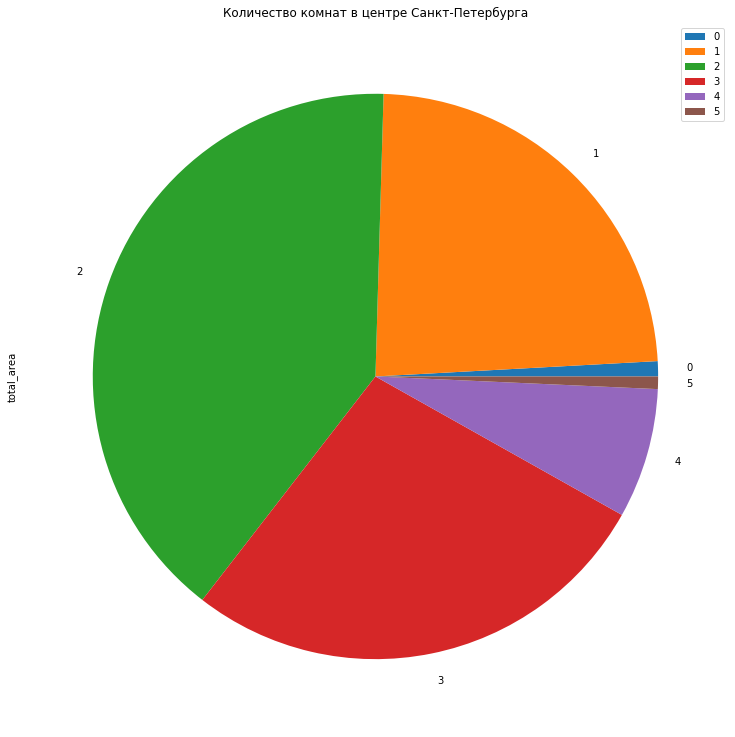

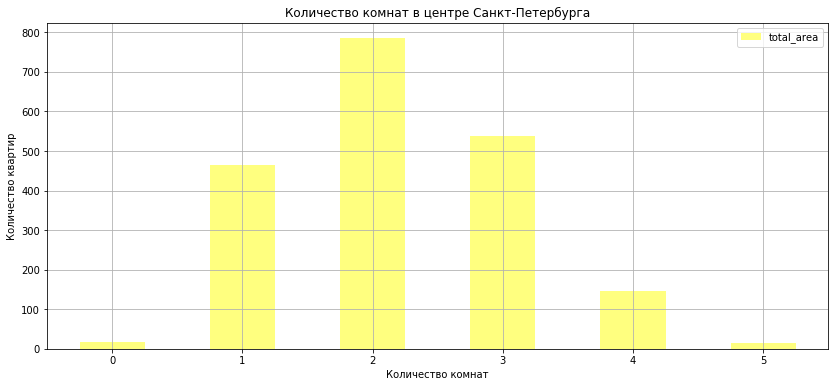

,total_area,percent
rooms,,
0,17,0.865580
1,465,23.676171
2,785,39.969450
3,537,27.342159
4,146,7.433809
5,14,0.712831


In [62]:
# Создаю датафрейм 'rooms_chart' в котором сохраню количество объявлений для каждого вида комнат
rooms_chart = spb_estate_data_center.pivot_table(index='rooms', values='total_area', aggfunc='count')

# Создаю новый столбец 'percent' в 'room_chart', в котором записываю долю каждого вида комнат от всех объявлений
rooms_chart['percent'] = (rooms_chart['total_area'] / rooms_chart['total_area'].sum()) * 100

# Рисую круговую гистограмму
rooms_chart.plot(y='total_area', kind='pie', figsize=(13, 13), title='Количество комнат в центре Санкт-Петербурга')
plt.show()
# Рисую столбчатую гистограмму
rooms_chart.plot(y='total_area', kind='bar', figsize=(14, 6), title='Количество комнат в центре Санкт-Петербурга', grid=True, color='yellow', alpha=0.5)
plt.xticks(rotation = 0)
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат')
plt.show()
display(rooms_chart)

Проанализировав полученные результаты можно сделать следующие выводы:
* Квартиры с __2__ и __3 комнатами__ наиболее популярные и занимают __40%__ и __27%__ соответственно, что значительно отличается от ситуации в остальных городах и районах. Ведь в предыдущем анализе я выяснил, что наиболее популярными квартирами были квартиры с 1 и 2 комнатами.
* Квартиры с __5__ занимают __менее 1%__ от общего количества объявлений, что тоже отличается от ситуации по остальным городам и районам.
* Квартиры с __0 комнатами__ - Студии - занимают __менее 1%__ от общего количества объявлений, ситуация аналогична для остальных городов и районов
* Наибольшее количество объявлений с продажей __2 комнатных квартир__, а для остальных городов и районов ситуация складывается иначе.
* Если выделить __топ 3__ самых популярных видов квартир, то в него войдут: __1__, __2__, __3 комнатные квартиры__ - здесь ситуация аналогичная как и в других городах и районах


##### Анализ высоты потолков в центре Санкт-Петербурга

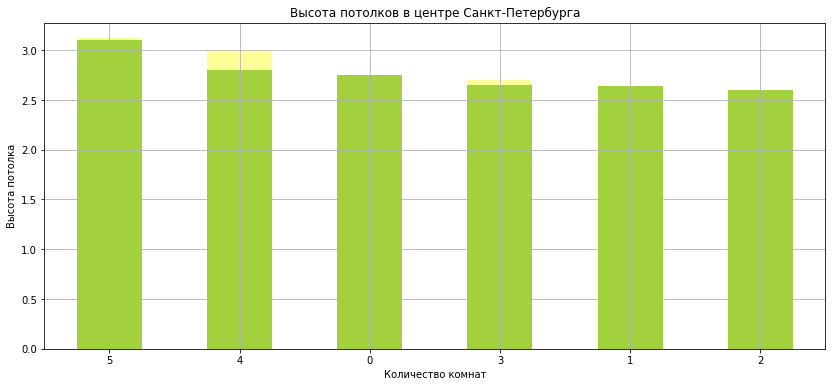

Медианное значение Высоты потолков:  2.7 

 Самые высокие потолки: 
22914    3.59
20381    3.56
5809     3.55
21449    3.55
4264     3.55
Name: ceiling_height, dtype: float64

 Самые низкие потолки: 
13271    2.40
987      2.46
193      2.47
21521    2.49
12668    2.50
Name: ceiling_height, dtype: float64

Описание столбца "ceiling_height"
count    1964.000000
mean        2.809435
std         0.259390
min         2.400000
25%         2.600000
50%         2.700000
75%         3.000000
max         3.590000
Name: ceiling_height, dtype: float64


In [63]:
ax = (
    clear_estate_data
    .pivot_table(index='rooms', values='ceiling_height', aggfunc='median')
    .sort_values(by='ceiling_height', ascending=False)
    .plot(y='ceiling_height', kind='bar', figsize=(14, 6), legend=False, color='green', alpha=0.6, grid=True)
)

# формирую сводную таблице по столбцам 'rooms' и сортирую её по убыванию, после чего рисую график
(
    spb_estate_data_center
    .pivot_table(index='rooms', values='ceiling_height', aggfunc='median')
    .sort_values(by='ceiling_height', ascending=False)
    .plot(y='ceiling_height', kind='bar', figsize=(14, 6), legend=False, ax=ax, alpha=0.4, grid=True, color='yellow', title='Высота потолков в центре Санкт-Петербурга')
)
plt.xticks(rotation = 0)
plt.ylabel('Высота потолка')
plt.xlabel('Количество комнат')
plt.show()

# Создаю переменную 'top_ceiling_height' - топ 5 самых высоких потолков
top_ceiling_height = spb_estate_data_center.sort_values('ceiling_height', ascending = False)['ceiling_height'].head(5)
# Создаю переменную 'tail_ceiling_height' - топ 5 самых низких потолков
tail_ceiling_height = spb_estate_data_center.sort_values('ceiling_height')['ceiling_height'].head(5)
print('Медианное значение Высоты потолков:', ClrG, spb_estate_data_center['ceiling_height'].median(), ClrDef)
print()
print(ClrG, 'Самые высокие потолки:', ClrDef)
print(top_ceiling_height)
print()
print(ClrG, 'Самые низкие потолки:', ClrDef)
print(tail_ceiling_height)
print()
print('Описание столбца "ceiling_height"')
print(spb_estate_data_center['ceiling_height'].describe())

Анализ показал, что для центра Санкт-Петербурга характерны следующие особенности:
* Самые __низкие__ потолки в __2 комнатных__ квартирах - для остальных городов  и районов ситуация такая же
* Самые __высокие__ потолки в __5 комнатных__ квартирах - для остальных городов  и районов ситуация такая же
* __Медианное значение__ высоты потолка равно __2.7м__, это на 0.06м больше чем для остальных городов  и районов.
* В __4 комнатных__ квартирах высота потолков ниже на 20см чем в остальных городах  и районах

<a id="num472"></a>
### 4.7.2. Анализ факторов влияющих на стоимость квартиры
##### Анализ цены и количества комнат в центре Санкт-Петербурга
Анализ данного параметра проведу по аналогии с пунктом 4.4.4. На графике укажу значения для центра Санкт-Петербурга *(Розовым цветом)* и значения для всех населённых пунктов *(Синим цветом)*.

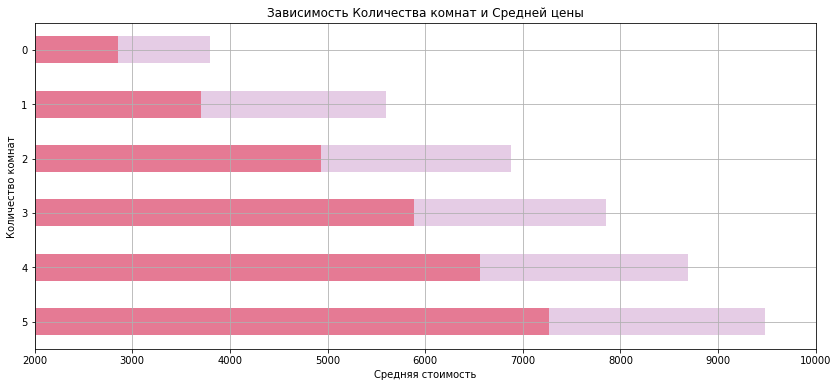

In [64]:
# Розовым цветом на графике обозначены значения для центра Санкт-Петербурга
# Синим цветом на графике обозначены значения для всех населённых пунктов
# ax - график зависимости 'Количества комнат и Средней цены' для всех населённых пунктов
ax = (
    clear_estate_data
    .pivot_table(index = 'rooms', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', title='Зависимость Количества комнат и Средней цены', figsize=(14, 6), legend=False, grid=True, color='red', alpha=0.4)
)

# Рисую график зависимости 'Количества комнат и Средней цены в Санкт-Петербурге'
(
    spb_estate_data_center
    .pivot_table(index = 'rooms', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', ax=ax, title='Зависимость Количества комнат и Средней цены', figsize=(14, 6), legend=False, color='purple', alpha=0.2, grid=True, xlim=(2000, 10000))
)
plt.ylabel('Количество комнат')
plt.xlabel('Средняя стоимость')
plt.show()

График зависимости __количества комнат__ от __средней цены__ наглядно демонстрирует то, что между двуми исследуемыми параметрами __есть прямая зависимость__. На графике видно, что __чем больше комнат__ в квартире, тем __выше её средняя стоимость__, данное наблюдение характерно как для центральной части Санкт-Петербурга, так и для остальных районов и населённых пунктов.

##### Анализ цены и этажа для центра Санкт-Петербурга
Анализ данного параметра проведу по аналогии с пунктом 4.4.5. На графике укажу значения для центра Санкт-Петербурга (Розовым цветом) и значения для всех населённых пунктов (Синим цветом).

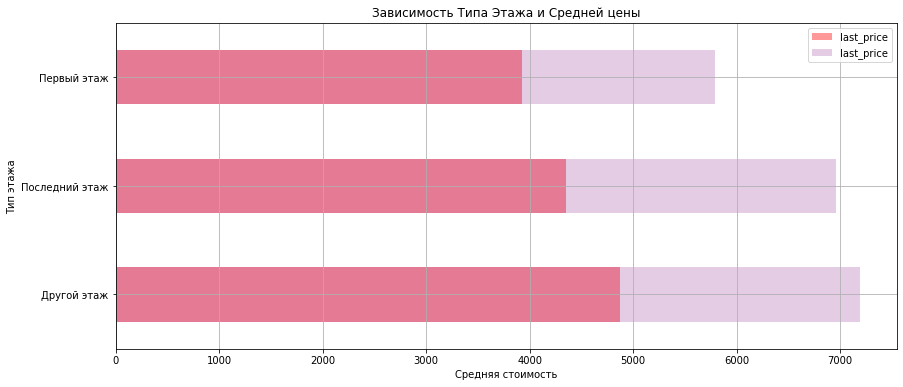

In [65]:
# Рисую график зависимости 'Типа Этажа и Средней цены' для всех населённый пунктов
ax = (
    clear_estate_data
    .pivot_table(index = 'floor_type', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', title='Зависимость Типа Этажа и Средней цены', figsize=(14, 6), legend=True, alpha=0.4, grid=True, ylim=(3800, 5000), color='red')
)
# Рисую график зависимости 'Типа Этажа и Средней цены' для центра Санкт-Петербурга
(
    spb_estate_data_center
    .pivot_table(index = 'floor_type', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', title='Зависимость Типа Этажа и Средней цены', figsize=(14, 6), ax=ax, color='purple', alpha=0.2, legend=True, grid=True, ylim=(3800, 5000))
)
plt.ylabel('Тип этажа')
plt.xlabel('Средняя стоимость')
plt.show()

На графике видно, что самая __высокая средняя стоимость__ у квартир, которые расположены __выше первого__ и __ниже последнего__ этажа. __Самые дешевые__ квартиры находятся на __первом этаже__, разница в средней стоимости между __первым__ и __другим этажом__ *(не последним)* составляет __более 1 млн. рублей__, что довольно много, при этом ситуация для всех населённых пунктов немного отличая, здесь эта разница составляет __менее 1 млн. рублей__. Проанализировав полученный график, можно сделать вывод о том, что __Средняя цена квартиры напрямую зависит от типа этажа__ на котором расположена квартира как в центре Санкт-Петербурга, так и во всех населённых пунктах.
##### Анализ цены и удалённости от центра Санкт-Петербурга
Анализ данного параметра проведу по аналогии с пунктом 4.4.2. На графике укажу значения для центра Санкт-Петербурга (Розовым цветом) и значения для всех населённых пунктов (Синим цветом).

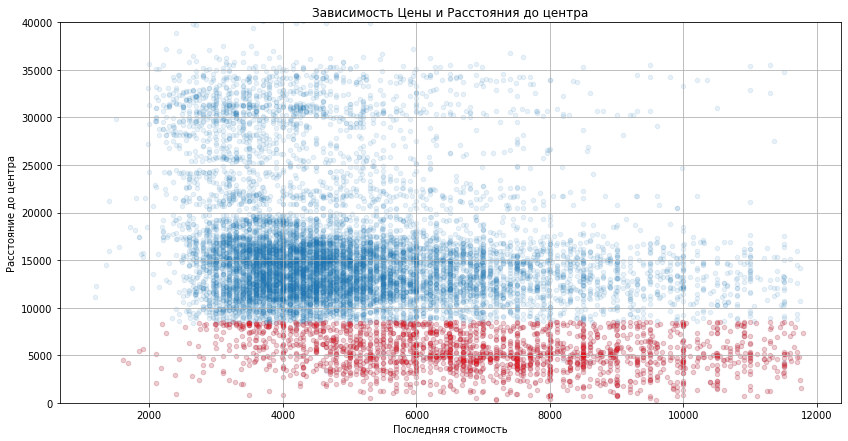

Коэффициент корреляции для всех населённых пунктов:  0.110 
Коэффициент корреляции для Центра Санкт-Петербурга:  -0.173 


In [66]:
# Рисую диаграмму рассеяния по столбцам 'цена' и 'расстояние до центра' для всех населённых пунктов
ax = (
    clear_estate_data
    .query('cityCenters_nearest != 0.666')
    .plot(x='last_price', y='cityCenters_nearest', kind='scatter', figsize=(6, 4), sharex=False, grid=True, alpha=0.1, ylim=(0, 40000))
)

# Рисую диаграмму рассеяния по столбцам 'цена' и 'расстояние до центра' для Санкт-Петербурга
(
    spb_estate_data_center
    .query('cityCenters_nearest != 0.666')
    .plot(x='last_price', y='cityCenters_nearest', kind='scatter', title='Зависимость Цены и Расстояния до центра', ax=ax, color='r', alpha=0.15, figsize=(14, 7), sharex=False, grid=True, ylim=(0, 40000))
)
plt.ylabel('Расстояние до центра')
plt.xlabel('Последняя стоимость')
plt.show()
corr_center = clear_estate_data['last_price'].corr(clear_estate_data['cityCenters_nearest'])
print('Коэффициент корреляции для всех населённых пунктов:', ClrG, '{:.3f}'.format(corr_center), ClrDef)
corr_center = spb_estate_data_center['last_price'].corr(spb_estate_data_center['cityCenters_nearest'])
print('Коэффициент корреляции для Центра Санкт-Петербурга:', ClrG, '{:.3f}'.format(corr_center), ClrDef)

Коэффициент корреляции Пирсона для центра Санкт-Петербурга изменился в отрицательную сторону и составляет -0.17, это говорит о том, что для центра Санкт-Петербурга между параметрами "цена" и "расстояние до центра" корреляция практически отсутствует. Наибольшая концентрация объявлений находится в ячейке с параметрами: Цена - 4-6 млн. рублей и расстояние от центра - 5-8 км, это говорит о том, что больше всего объявлений имеют данные параметры. В зоне менее 5 км имеются как дешёвые так и дорогие квартиры, поэтому завасимость данных параметров практически отсутствует.

##### Анализ цены и даты размещения объявления для центра Санкт-Петербурга
Анализ данного параметра проведу по аналогии с пунктом 4.4.5. На графике укажу значения для центра Санкт-Петербурга (Розовым цветом) и значения для всех населённых пунктов (Синим цветом).

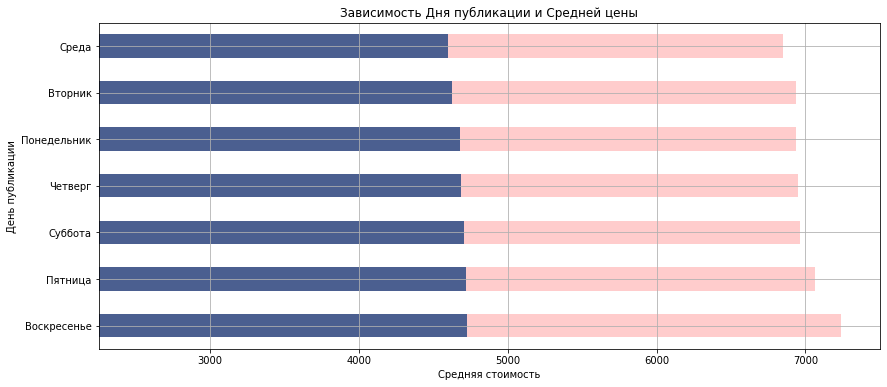

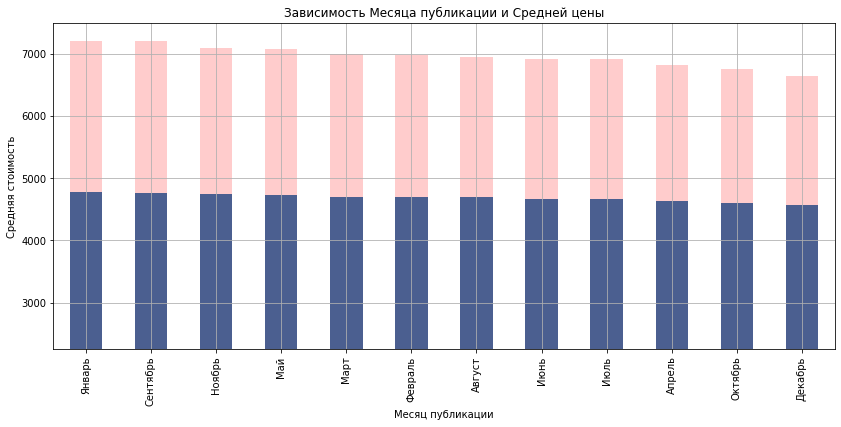

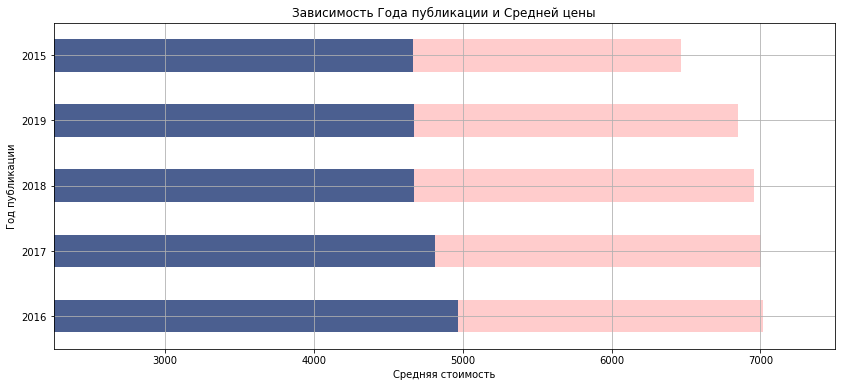

In [67]:
# Рисую график зависимости 'Дня публикации и Средней цены' для всех населённых пунктов
axday = (
    clear_estate_data
    .pivot_table(index = 'public_day', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', figsize=(10, 5), legend=False, grid=True)
)
# Рисую график зависимости 'Дня публикации и Средней цены' для центра Санкт-Петербурга
(
    spb_estate_data_center
    .pivot_table(index = 'public_day', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', title='Зависимость Дня публикации и Средней цены', figsize=(14, 6), ax=axday, legend=False, alpha=0.2, color='r', grid=True, xlim=(2250, 7500))
)
plt.ylabel('День публикации')
plt.xlabel('Средняя стоимость')
plt.show()


# Рисую график зависимости 'Месяца публикации и Средней цены' для всех населённых пунктов
axmonth = (
    clear_estate_data
    .pivot_table(index = 'public_month', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='bar', figsize=(10, 6), grid=True, legend=False)
)
# Рисую график зависимости 'Месяца публикации и Средней цены' для центра Санкт-Петербурга
(
    spb_estate_data_center
    .pivot_table(index = 'public_month', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='bar', title='Зависимость Месяца публикации и Средней цены', legend=False, figsize=(14, 6), ax=axmonth, alpha=0.2, color='r', grid=True, ylim=(2250, 7500))
)
plt.ylabel('Средняя стоимость')
plt.xlabel('Месяц публикации')
plt.show()


# Рисую график зависимости 'Года публикации и Средней цены' для всех населённых пунктов
axyear = (
    clear_estate_data
    .pivot_table(index = 'public_year_num', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', figsize=(8, 4), grid=True, legend=False)
)
# Рисую график зависимости 'Года публикации и Средней цены' для центра Санкт-Петербурга
(
    spb_estate_data_center
    .pivot_table(index = 'public_year_num', values = 'last_price', aggfunc= 'mean')
    .sort_values(by='last_price', ascending=False)
    .plot(y='last_price', kind='barh', legend=False, title='Зависимость Года публикации и Средней цены', figsize=(14, 6), ax=axyear, alpha=0.2, color='r', grid=True, xlim=(2250, 7500))
)
plt.ylabel('Год публикации')
plt.xlabel('Средняя стоимость')
plt.show()

* Анализ __дня публикации__:

    Говоря о зависимости между __днём публикации объявления__ и __средней ценой__ квартир, на графике видно, что максимальная средняя цена для __Центра Санкт-Петербурга__ обнаружена в такие дни как __воскресенье__ и __пятница__, а для __всех населённых пунктов__ во __вторник__ и __четверг__, следовательно данные параметры различаются и теперь нельзя говорить о закономерности: *объявления опубликованные в будние дни имеют выше среднюю цену квартир чем в выходные дни*, данная закономерность наблюдается только для всех населённых пунктов, а центр Санкт-Петербурга является исключением.

* Анализ __месяца публикации__:

    Анализируя график зависимости между __месяцем публикации объявления__ и __средней ценой__ квартир для __центра Санкт-Петербурга__, можно отметить тот факт, что в __январе__ средняя цена квартир самая высокая, а в __декабре__ самая низкая, а для __всех населённых пунктов__ в __сентябре__ самая высокая стоимость квартир, а в __июне__ самая низкая. 

* Анализ __года публикации__:

    На грфике видно, что в 2016 году была зафиксирована __самая высокая средняя стоимость__ для квартир __в центре Санкт-Петербурга__, ситуация аналогична и для __всех населённых пунктов__. А __самая низкая сердняя стоимость__ квартир в __центре Санкт-Петербурга__ в __2015 году__, при этом для __всех населённых пунктов__ самая низкая средняя стоимость была __в 2018 году__.

## Вывод
Проведя детальный анализ центральной части Санкт-Петербурга и сравнивая различные показатели для центральной части и всех населённых пунктов, стоить отметить следующие особенности центральной зоны:

* Медианная стоимость квартиры в центре Санкт-Петербурга напрямую зависит от количества комнат: Чем больше комнат - Тем выше медианное значение стоимости квартиры. Максимальная стоимость у 2, 3 и 4 комнатных квартир. Это наблюдение аналогично наблюдениям по остальным городам и районам.


* Квартиры с 2 и 3 комнатами наиболее популярные и занимают 40% и 27% соответственно, квартиры с 5 занимают менее 1% от общего количества объявлений. Наибольшее количество объявлений с продажей 2 комнатных квартир, а для остальных городов и районов ситуация складывается иначе.


* Медианное значение высоты потолка равно 2.7м. Самые низкие потолки в 2 комнатных квартирах, а самые высокие потолки в 5 комнатных квартирах.


* Между параметрами "количество комнат" и "средняя стоимость" квартиры есть прямая зависимость: чем больше комнат в квартире, тем выше её средняя стоимость, данное наблюдение характерно как для центральной части Санкт-Петербурга, так и для остальных районов и населённых пунктов.


* Самая высокая средняя стоимость у квартир, которые расположены выше первого и ниже последнего этажа. Самые дешевые квартиры находятся на первом этаже, разница в средней стоимости между первым и другим этажом *(не последним)* составляет более 1 млн. рублей, при этом ситуация для всех населённых пунктов немного другая, здесь эта разница составляет менее 1 млн. рублей. Средняя цена квартиры напрямую зависит от типа этажа на котором расположена квартира как в центре Санкт-Петербурга, так и во всех населённых пунктах.


* Для центра Санкт-Петербурга между параметрами "цена" и "расстояние до центра" корреляция практически отсутствует. Наибольшая концентрация объявлений находится в диапозоне: Цена - 4-6 млн. рублей и расстояние от центра - 5-8 км. В зоне менее 5 км имеются как дешёвые так и дорогие квартиры.


* Максимальная средняя цена для Центра Санкт-Петербурга у объявлений опубликованных в воскресенье и пятницу, а для всех населённых пунктов во вторник и четверг. В центре Санкт-Петербурга в январе средняя цена квартир самая высокая, а в декабре самая низкая, а для всех населённых пунктов в сентябре самая высокая стоимость квартир, а в июне самая низкая. Также в 2016 году была самая высокая средняя стоимость для квартир в центре Санкт-Петербурга, ситуация аналогична и для всех населённых пунктов. А самая низкая сердняя стоимость квартир в центре Санкт-Петербурга в 2015 году, при этом для всех населённых пунктов самая низкая средняя стоимость была в 2018 году.

<a id="result"></a>
## Шаг 5. Общий вывод

Проведя комплексный анализ данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет мне удалось выявить наиболее значимые параметры, которые влияют на формирование стоимости квартиры:
* __Количество комнат__ - чем больше комнат, тем выше стоимость жилья
* __Общая площадь квартиры__ - чем больше площадь, тем выше стоимость жилья
* __Этаж квартиры__ - на первом этаже самые дешевые квартиры, наиболее дорогие квартиры распагаются выше первого и ниже последнего этажа

Так же удалось расчитать следующие показатели:
* Средняя стоимость жилья составляет __4.8 млн. рублей__
* Средняя площадь жилья составляет __60 м²__
* Больше всего квартир имеют площадь __до 38м²__ = 22% от всех объявлений
* Наиболее популярные квартиры имеют __2__ комнаты

Так же мне удалось вывить оптимальный период времени за который продаются квартиры:
* Квартиры проданные в срок __до 41 дня__ можно считать __быстро проданными__
* Квартиры проданные в срок, __превышающий 90 дней__ можно считать __долго продающимися__